In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn import models

import tensorflow as tf
from tensorflow import keras

import numpy as np
import math
import pandas as pd
import shap
from scipy.signal import find_peaks, peak_widths
import pickle
import itertools
from pygam import LinearGAM, LogisticGAM, s, f, te

from sklearn.mixture import GaussianMixture
import matplotlib

from sklearn.metrics import confusion_matrix, classification_report, silhouette_score

import matplotlib.pyplot as plt

Using TensorFlow backend.


### Some examples of star models

In [2]:
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)
if False:
    for star in df_bedding.take(10):
        # print(np.where(star[1]==1))
        plt.plot(star[1][0, :, 0])
        plt.plot(star[1][0, :, 1])
        # plt.plot(star[1][0, :, 2], alpha=0.5)
        plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

In [3]:
df = starmodels().load(
    "/home/roberto/Downloads/evolutionTracks_line/parts_train/*",
    batch_size=1,
    add_noise=False,
)
if False:
    for star in df.take(20):
        # print(star[0])
        print(np.where(star[1] == 1))
        plt.plot(star[0][0, :, 0])
        plt.plot(star[0][0, :, 1])
        # plt.plot(star[0][0, :, 2], alpha=0.5)
        plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [4]:
df_ds = deltascuti()
df_start = df_ds.load("../../astronn/data/deltascuti/preprocessed/*", batch_size=1)
if False:
    for star in df_start.take(10):
        # print(np.where(star[1]==1))
        print(star[0])
        plt.plot(star[1][0, :, 0])
        plt.plot(star[1][0, :, 1])
        # plt.plot(star[1][0, :, 2], alpha=0.5)
        plt.show()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

#### Calculate means and sd from data

In [5]:
if False:
    star_ac_values = [star[0][0, :, 1].numpy() for star in df.take(77)]
    print("Models- mean:%f sd:%f" % (np.median(star_ac_values), np.std(star_ac_values)))
    print(
        "-----------------------------------------------------------------------------"
    )
    bs_ac_values = [star[1][0, :, 1] for star in df_start.take(10)]
    print("11BS  - mean:%f sd:%f" % (np.median(bs_ac_values), np.std(bs_ac_values)))
    bedding_ac_values = [star[1][0, :, 1] for star in df_bedding.take(77)]
    print(
        "Bedd  - mean:%f sd:%f"
        % (np.median(bedding_ac_values), np.std(bedding_ac_values))
    )

    plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
    plt.hist([item for sublist in bs_ac_values for item in sublist], bins=100)
    plt.show()

    plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
    plt.hist([item for sublist in bedding_ac_values for item in sublist], bins=100)
    plt.show()

In [6]:
if False:
    star_ac_values = [star[0][0, :, 0] for star in df.take(77)]
    print("Models- mean:%f sd:%f" % (np.median(star_ac_values), np.std(star_ac_values)))
    print(
        "-----------------------------------------------------------------------------"
    )
    bs_ac_values = [star[1][0, :, 0] for star in df_start.take(10)]
    print("11BS  - mean:%f sd:%f" % (np.median(bs_ac_values), np.std(bs_ac_values)))
    bedding_ac_values = [star[1][0, :, 0] for star in df_bedding.take(77)]
    print(
        "Bedd  - mean:%f sd:%f"
        % (np.median(bedding_ac_values), np.std(bedding_ac_values))
    )

In [7]:
if False:
    #### plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
    plt.hist([item for sublist in bs_ac_values for item in sublist], bins=100)
    plt.show()

    plt.hist([item for sublist in star_ac_values for item in sublist], bins=100)
    plt.hist([item for sublist in bedding_ac_values for item in sublist], bins=100)
    plt.show()

### The next Period-Luminosity relation is obtained by using the data provided in McNamara (2011):

$\log_{10} \text{L}_\odot = 1.4722 (0.100) \log_{10} \text{P} + 2.6089 (0.096)$

&nbsp;
&nbsp;


### Period (variable $\text{P}$) is isolated to obtained its value given the Luminosity.

$\log_{10} \text{L}_\odot - 2.6089 (0.096) = 1.4722 (0.100) \log_{10} \text{P}$

$\log_{10} \text{P} = \Large\frac{\log_{10} \text{L}_\odot - 2.6089 (0.096)}{1.4722 (0.100)}$

$\text{P} = 10\Large^{\Large\frac{\log_{10} \text{L}_\odot - 2.6089 (0.096)}{1.4722 (0.100)}}$

&nbsp;

The fundamental radial mode $\text{P}_0$ is related to the mean density by the pulsation constant $\text{Q} = \text{P} \cdot \Large\sqrt{\frac{\rho}{\rho_\odot}}$ (see Breger, 1990). For $\text{P}_0$ the value of $\text{Q} = [0.03, 0.0492] \text{ (days)}$

Thus, by isolating $\frac{\rho}{\rho_\odot}$ in the above equation and given the value of $\text{P}$, we have a direct estimation of the mean density, as follows:

&nbsp;

$\Large\frac{\rho}{\rho_\odot} = \Big( \frac{Q}{P}\Big)^2$

In [8]:
def get_log_l(P, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    P-L relation for McNamara (2011)
    """
    return A * np.log10(P) + B


def get_P(log_L, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    P variable isolated from log_L relation
    """
    return np.power(10, (log_L - B) / (A))


def get_rho_from_P(P, Q=0.033):
    """
    """
    return np.power(Q / P, 2)


# Example
P = 2.34
log_l = get_log_l(P=P)
P_equation = get_P(log_L=log_l)
print("P value = %f" % P)
print("log L is equal to %f" % log_l)
print("P from equation %f" % P_equation)
# Assert results
np.testing.assert_almost_equal(P, P_equation)

P value = 2.340000
log L is equal to 3.152460
P from equation 2.340000


### Relate to the error, we use a standard error propagation to calculate it:

$\Delta P = \sqrt{\Big(\frac{\delta \text{P}}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \text{P}}{\delta \text{B}}\Delta\text{B}\Big)^2   +    \Big(\frac{\delta \text{P}}{\delta \text{L}}\Delta\text{L}\Big)^2}$ where $A = 1.4722$ with uncertainty $\Delta A = 0.100$ and $B = 2.6089$ with uncertainty $\Delta B = 0.096$

$\Delta P = \sqrt{ \Big( 10^{\frac{\text{L}_\odot - B}{A}}  * (2.30258509 * A^2) * \text{L}_\odot * \Delta A \Big)^2 + \Big( 10^{\frac{\text{L}_\odot - B}{A}}  * (2.30258509 * A) *  \Delta B \Big)^2}$


&nbsp;

## Range of $\rho$ used through PL relation

To calculate a valid PL window, we will use the next range:

$\Large[ \frac{\rho}{\rho_\odot}_{\min} = \Big( \frac{0.033}{P+\Delta_p}\Big)^2, \frac{\rho}{\rho_\odot}_{\max} = \Big( \frac{0.042}{P-\Delta_p}\Big)^2 \Large]$

In [9]:
def p_error(log_L, A=1.4722, e_A=0.1, B=2.6089, e_B=0.096):
    """
    """
    return np.sqrt(
        np.power(
            np.power(10, (log_L - B) / A) * (2.30258509 / np.power(A, 2)) * log_L * e_A,
            2,
        )
        + np.power(np.power(10, (log_L - B) / A) * (2.30258509 / A) * e_B, 2)
    )


l_value = 1.3
print(
    "Period for L=%f is equal to %f +-(%f)"
    % (l_value, get_P(log_L=1.3), p_error(log_L=1.3))
)

Period for L=1.300000 is equal to 0.129099 +-(0.026337)


### Relation Rodriguez-Martin et.al. 2020

$\frac{\bar{\rho}}{\rho} = 1.6^{+0.5}_{-0.4} \Big( \langle\Delta\nu\rangle / \Delta\nu_\odot \Big)^{2.02^{+0.10}_{-0.10}}$

For the moment, we will use a simetric error in the first term i.e.: $1.6^{+0.5}_{-0.5}$

$\Delta \frac{\bar{\rho}}{\rho} = \sqrt{\Big(\frac{\delta \frac{\bar{\rho}}{\rho}}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \frac{\bar{\rho}}{\rho}}{\delta \text{B}}\Delta\text{B}\Big)^2 }$ where $A = 1.6$ with uncertainty $\Delta A = 0.5$ and $B = 2.02$ with uncertainty $\Delta B = 0.1$

$\Delta \frac{\bar{\rho}}{\rho}  = \sqrt{ ( {\langle\Delta\nu\rangle / \Delta\nu_\odot} )^B * \Delta \text{A} )^2 +  (A * ( {\langle\Delta\nu\rangle / \Delta\nu_\odot} )^B + \log_{10}(x) * \Delta B)^2 }$


&nbsp;
&nbsp;

Inversely, we can get $\Delta \nu$ from $\rho$ as follows:

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \Big( \frac{\frac{\bar{\rho}}{\rho}}{1.6^{+0.5}_{-0.4}} \Big)^{\big(2.02^{+0.10}_{-0.10} \big)^{-1}}$

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \sqrt{\Big(\frac{\delta \langle\Delta\nu\rangle / \Delta\nu_\odot}{\delta \text{A}}\Delta\text{A}\Big)^2  +  \Big(\frac{\delta \langle\Delta\nu\rangle / \Delta\nu_\odot}{\delta \text{B}}\Delta\text{B}\Big)^2 }$ where $A = 1.6$ with uncertainty $\Delta A = 0.5$ and $B = 2.02$ with uncertainty $\Delta B = 0.1$

$\langle\Delta\nu\rangle / \Delta\nu_\odot = \sqrt{  -(Y * 1/(\ln(B) * Y/A) * \Delta A)^2 + (-\log(Y/A)*1/B/\ln(B)^2 * \Delta B)^2 }$



In [10]:
def get_rho(delta_nu):
    """
    """
    return 1.6 * np.power(delta_nu, 2.02)


def rho_error(delta_nu, A=1.6, e_A=0.5, B=2.02, e_B=0.1):
    """
    """
    return np.sqrt(
        np.power(np.power(delta_nu, B) * e_A, 2)
        + np.power(A * np.power(delta_nu, B) * np.log10(delta_nu) * e_B, 2)
    )


delta_nu_value = 1.3
print(
    "Delta_nu == %f is a rho equal to %f +-(%f)"
    % (l_value, get_rho(delta_nu=delta_nu_value), rho_error(delta_nu=delta_nu_value))
)

Delta_nu == 1.300000 is a rho equal to 2.718226 +-(0.850010)


In [11]:
def get_dnu_from_rho(rho):
    """
    """
    return math.pow(rho / 1.6, math.pow(2.02, -1))


def dnu_error(rho, A=1.6, e_A=0.0, B=2.02, e_B=0.1):
    """
    """
    return np.sqrt(
        math.pow(
            -math.pow(rho / A, 1 / B - 1) * (1 / B / math.pow(A, 2)) * rho * e_A, 2
        )
        + math.pow(
            -math.pow(rho / A, 1 / B)
            / math.pow(B, 2)
            * math.log(rho / A, math.e)
            * e_B,
            2,
        )
    )


rho = 2.718226
print(
    "rho == %f is a Delta_nu equal to %f +-(%f)"
    % (rho, get_dnu_from_rho(rho=rho), dnu_error(rho=rho))
)

# Assert results
np.testing.assert_almost_equal(get_dnu_from_rho(rho=rho), delta_nu_value)

rho == 2.718226 is a Delta_nu equal to 1.300000 +-(0.016885)


In [12]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, "--", label="x " + str(slope))

#### Load pre-trained NN model

In [13]:
# Load model
# sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_400/")
# sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_400_2/")
# sepconv_mod = tf.keras.models.load_model("/home/roberto/Projects/sepconvnn_tmp_dos_200/")
# sepconv_mod = tf.keras.models.load_model("/tmp/sepconvnn_tmp_dos_500/")
sepconv_mod = tf.keras.models.load_model(
    "/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/"
)

sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

## Read an process 11 binaries DS

##### Calculate Luminosity

In [14]:
csv_ds = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_ds.head(20))

# 1 mas = 0.00099999995874704 arcsec
Mv = csv_ds["mv"] + 5 * (np.log10(csv_ds["parallax"] * 0.00099999995874704) + 1)
mbolsun = 4.74
# calculate Luminosity
csv_ds["L"] = (np.power(10, 0.4 * (mbolsun - Mv))) * csv_ds["L.Ltot"]

# Filter columns and add HD15082 info300
csv_ds = csv_ds[["ID", "Dnu_muHz", "L", "Teff", "L.Ltot", "parallax", "mv"]]
csv_ds.loc[csv_ds["ID"] == "HD15082", ["L"]] = 6.14
csv_ds.loc[csv_ds["ID"] == "HD15082", ["Dnu_muHz"]] = 80
# Updated CID100866999 with Gaia Luminosity
csv_ds.loc[csv_ds["ID"] == "CID100866999", ["L"]] = 3.865

csv_ds.head(11)
# csv_ds.to_csv("../data/deltascuti/binaries_obs.csv", index=False, header=True)

              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350
10       HD15082        80   6.140000     0   0.000    0.0000   0.0000
divide by zero encountered in log10


ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.865000  7300     NaN    0.5654  15.0970
5   CID105906206        20   9.396579  6750   0.940    0.9901  12.2620
6       HD159561        38  24.642612  8047   1.000   67.1300   2.1262
7     KIC9851944        26  60.062351  6902   0.500    0.4100  11.4770
8     KIC8262223        77   5.139949  9128   0.900    0.9832  12.8850
9    KIC10080943        52   7.085301  7480   0.500    1.0600  11.7350
10       HD15082        80   6.140000     0   0.000    0.0000   0.0000

In [15]:
for l_value in csv_ds["L"]:
    print(
        "Period for L=%f is equal to %f +-(%f)"
        % (l_value, get_P(log_L=np.log10(l_value)), p_error(log_L=np.log10(l_value)))
    )

Period for L=21.520774 is equal to 0.135907 +-(0.028049)
Period for L=6.475306 is equal to 0.060110 +-(0.010407)
Period for L=29.304625 is equal to 0.167616 +-(0.036273)
Period for L=29.942319 is equal to 0.170085 +-(0.036929)
Period for L=3.865000 is equal to 0.042336 +-(0.006883)
Period for L=9.396579 is equal to 0.077408 +-(0.014111)
Period for L=24.642612 is equal to 0.149005 +-(0.031399)
Period for L=60.062351 is equal to 0.272908 +-(0.065866)
Period for L=5.139949 is equal to 0.051382 +-(0.008636)
Period for L=7.085301 is equal to 0.063900 +-(0.011197)
Period for L=6.140000 is equal to 0.057977 +-(0.009967)


In [16]:
# Load Teff,Dnu -> L model from star models
with open("../models/gam_teff_dnu/gam.pkl", "rb") as f:
    gam_teff_dnu = pickle.load(f)
gam_teff_dnu.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     84.6873
Link Function:                     IdentityLink Log Likelihood:                               -960654.4226
Number of Samples:                       494768 AIC:                                          1921480.2198
                                                AICc:                                         1921480.2499
                                                GCV:                                                2.2207
                                                Scale:                                                2.22
                                                Pseudo R-Squared:                                   0.9958
Feature Function                  Lam

In [17]:
def get_peak_width(position, peaks, peaks_width, peaks_sorted_by_prob):
    """
    """
    peak_id = np.where(probs == peaks_sorted_by_prob[position])[0][0]
    return (peak_id, peaks_width[0][np.where(peaks == peak_id)[0][0]])

In [18]:
def calculate_shap_by_gradient(model, x_explain):
    """
    """
    e = shap.DeepExplainer(model, x_train, batch_size=1000, local_smoothing=0)
    shap_values, indexes = e.shap_values(x_explain, nsamples=10000, ranked_outputs=5)
    return shap_values, indexes


# Read star models (trainning) to calculate shap values
star_models = starmodels()
df_sm = star_models.load(
    "/home/roberto/Downloads/evolutionTracks_line/parts_train/*",
    batch_size=150,
    add_noise=True,
)

_train_shap = np.asarray([line[0].numpy() for line in df_sm.take(10)])
_train_shap = _train_shap.reshape(
    (
        _train_shap.shape[0] * _train_shap.shape[1],
        _train_shap.shape[2],
        _train_shap.shape[3],
    )
)
# Shap explainer
e = shap.GradientExplainer(
    sepconv_mod, _train_shap, batch_size=10, local_smoothing=True
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

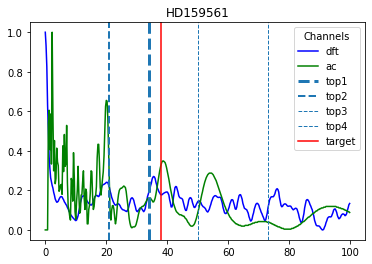

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

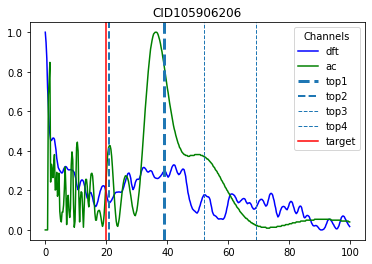

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

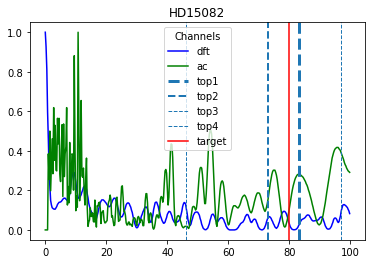

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

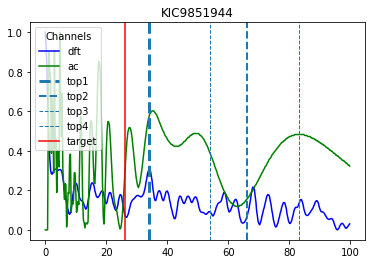

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

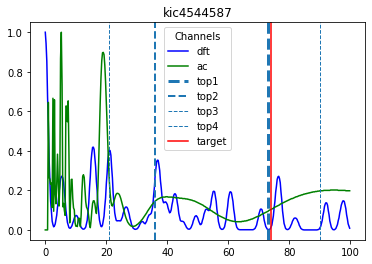

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

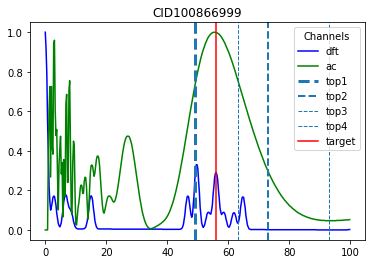

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

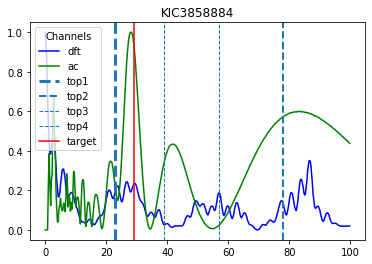

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


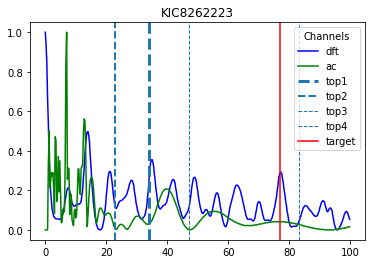

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

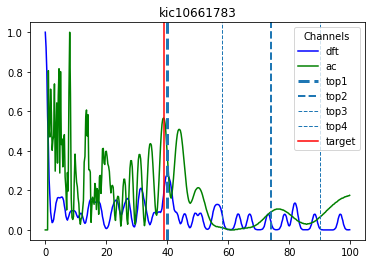

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


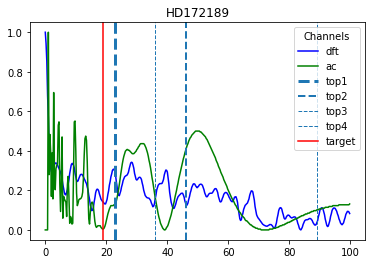

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


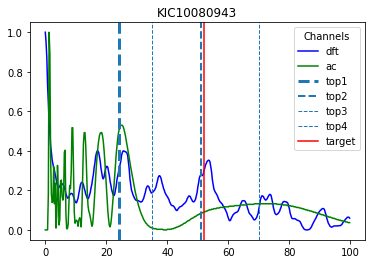

In [19]:
dnu_sun = 134.8

# Save results and predictions
results = {}
for star in df_start.take(11):  # take the 11 ds stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0]
    # Save results
    if star[0].numpy()[0].decode("utf-8") not in results:
        results[star[0].numpy()[0].decode("utf-8")] = {
            "dnu-target": target,
        }

    # Calculate gradient explainers and shap values
    shap_values, indexes = e.shap_values(
        star[1].numpy(), nsamples=100, ranked_outputs=4
    )

    probs = sepconv_mod.predict_proba(star[1])[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_width = peak_widths(probs, peaks)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        0, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top1"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top1"] = best_peak_width

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        1, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top2"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top2"] = best_peak_width

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        2, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top3"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top3"] = best_peak_width

    # save top-k
    best_peak, best_peak_width = get_peak_width(
        3, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["top4"] = best_peak
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top4"] = best_peak_width

    # Get L from Teff,Dnu model
    L = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())]["L"].values
    Teff = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())][
        "Teff"
    ].values
    if len(L) > 0 and not np.isnan(L) and not np.isnan(Teff):
        l_teff_topk1 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top1"], Teff]
            ).reshape(1, 2)
        )[0]

        l_teff_topk2 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top2"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk3 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top3"], Teff]
            ).reshape(1, 2)
        )[0]

        # Get L errors
        ls_teff_topks = [l_teff_topk1, l_teff_topk2, l_teff_topk3]
        # Get L errors
        errors = [
            round(np.power(l_teff_topk1 - L[0], 2), 2),
            round(np.power(l_teff_topk2 - L[0], 2), 2),
            round(np.power(l_teff_topk3 - L[0], 2), 2),
        ]
        i = np.argmin(errors)  # Get min error position
        L = ls_teff_topks[i]  # Get most probable L from the model

        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_up) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_down) * dnu_sun
        )
    else:
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-up-fromstarmodel"
        ] = np.nan
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-down-fromstarmodel"
        ] = np.nan

    # Get P from L
    # Check for non L in csv or NaN value
    L = csv_ds[csv_ds.ID.eq(star[0].numpy()[0].decode("utf-8").upper())]["L"].values
    if len(L) > 0 and not np.isnan(L):
        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = (
            get_dnu_from_rho(rho_q_up[0]) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = (
            get_dnu_from_rho(rho_q_down[0]) * dnu_sun
        )
    else:
        print(star[0].numpy()[0].decode("utf-8"))
        print(L)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = np.nan
        results[star[0].numpy()[0].decode("utf-8")]["v-from-P-down"] = np.nan

    if True:
        x = np.arange(0, 100, 0.25)  # x axis from 0 to 100
        plt.plot(x, star[1][0, :, 0], label="dft", color="blue")
        # plt.plot(x, star[1][0, :, 1], label="hod", color="orange", alpha=0.5)
        plt.plot(x, star[1][0, :, 1], label="ac", color="green")
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top1"],
            label="top1",
            linestyle="dashed",
            linewidth=3,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top2"],
            label="top2",
            linestyle="dashed",
            linewidth=2,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top3"],
            label="top3",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top4"],
            label="top4",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(x=target, label="target", color="red")
        plt.title(star[0].numpy()[0].decode("utf-8"))
        plt.legend(title="Channels")
        plt.show()

In [20]:
df = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "top1",
        "e-top1",
        "top2",
        "e-top2",
        "top3",
        "e-top3",
        "top4",
        "e-top4",
        "dnu-from-P-up-fromstarmodel",
        "dnu-from-P-down-fromstarmodel",
        "dnu-from-P-up",
        "dnu-from-P-down",
    ]
)
for i, id in enumerate(results):
    df.loc[i] = [
        id,
        results[id]["dnu-target"],
        results[id]["top1"],
        results[id]["e-top1"],
        results[id]["top2"],
        results[id]["e-top2"],
        results[id]["top3"],
        results[id]["e-top3"],
        results[id]["top4"],
        results[id]["e-top4"],
        results[id]["dnu-from-P-up-fromstarmodel"],
        results[id]["dnu-from-P-down-fromstarmodel"],
        results[id]["dnu-from-P-up"],
        results[id]["dnu-from-P-down"],
    ]

# Derive rho from Dnu
df["rho-target"] = get_rho(df["dnu-target"] / dnu_sun)
df["e-rho-target"] = rho_error(np.float64(df["dnu-target"].values / dnu_sun))
df["rho-top1"] = get_rho(df["top1"] / dnu_sun)
df["e-rho-top1"] = rho_error(np.float64(df["top1"].values / dnu_sun))
df["rho-top2"] = get_rho(df["top2"] / dnu_sun)
df["e-rho-top2"] = rho_error(np.float64(df["top2"].values / dnu_sun))
df["rho-top3"] = get_rho(df["top3"] / dnu_sun)
df["e-rho-top3"] = rho_error(np.float64(df["top3"].values / dnu_sun))
df["rho-top4"] = get_rho(df["top4"] / dnu_sun)
df["e-rho-top4"] = rho_error(np.float64(df["top4"].values / dnu_sun))

df

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0       HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   
1   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
2        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
3     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
4     kic4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
5   CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   
6     KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   
7     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
8    kic10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
9       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
10   KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   

      e-top4  ...  rho-target  e-rho-target   rho-top1  e-rho-top1   rho-top2  \
0   1.730440  ...    0.123968      0.039335  0.0990225    0.031506  0.0374136   
1   1.141167  ...   0.0339021      0.010961   0.130646    0.041429  0.0374136   
2   1.144795  ...    0.557684      0.174734   0.600737    0.188156   0.463509   
3   1.387807  ...    0.057596      0.018463  0.0990225    0.031506   0.378116   
4   1.116072  ...    0.476425      0.149399   0.463509    0.145372   0.111142   
5   0.980278  ...    0.271323      0.085418   0.207177    0.065380   0.463509   
6   1.314869  ...   0.0718109      0.022947  0.0449611    0.014468    0.52988   
7   1.311323  ...    0.516247      0.161815  0.0990225    0.031506  0.0449611   
8   1.154284  ...    0.130646      0.041429   0.137502    0.043577   0.476425   
9   1.336333  ...   0.0305653      0.009899  0.0449611    0.014468   0.182355   
10  1.046125  ...      0.2336      0.073637  0.0489974    0.015746   0.224615   

    e-rho-top2  rho-top3  e-rho-top3   rho-top4  e-rho-top4  
0     0.012076  0.215807    0.068077   0.463509    0.145372  
1     0.012076  0.413639    0.129821     0.2336    0.073637  
2     0.145372  0.823048    0.257471   0.182355    0.057618  
3     0.118742  0.600737    0.188156   0.252105    0.079417  
4     0.035312  0.707483    0.221437  0.0374136    0.012076  
5     0.145372  0.344203    0.108163   0.755931    0.236542  
6     0.166065  0.281199    0.088501   0.130646    0.041429  
7     0.014468  0.600737    0.188156   0.190451    0.060151  
8     0.149399  0.707483    0.221437   0.291253    0.091640  
9     0.057618  0.111142    0.035312   0.691694    0.216514  
10    0.070830  0.104994    0.033382   0.425838    0.133625  

[11 rows x 24 columns]

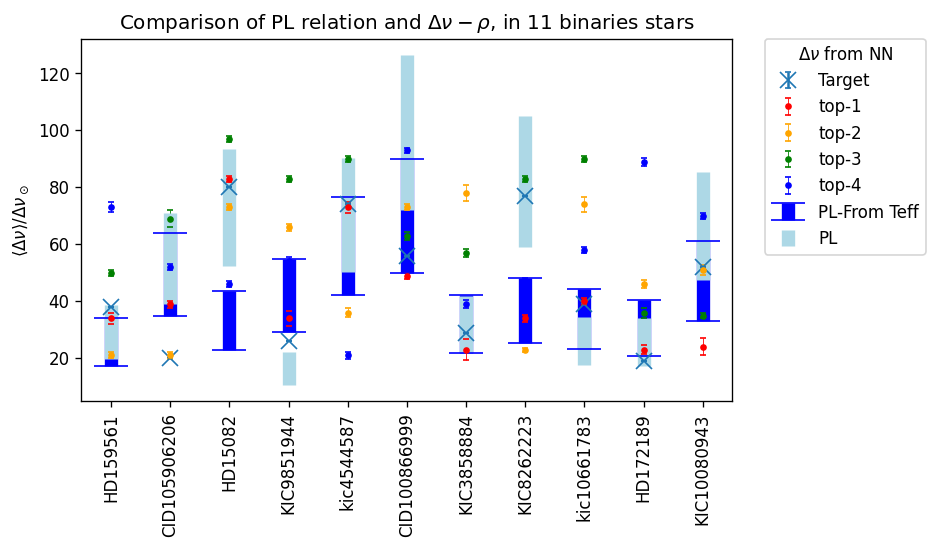

In [21]:
plt.subplots(1, figsize=(7, 4), dpi=120)

plt.errorbar(
    df["id"], df["dnu-target"], 0, fmt="x", markersize=10, capsize=2, label="Target"
)

plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
plt.errorbar(
    df["id"],
    df["top4"],
    df["e-top4"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="blue",
    label="top-4",
)

plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)

plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)

plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 11 binaries stars")
# plt.ylim(0, 1.0)
plt.show()

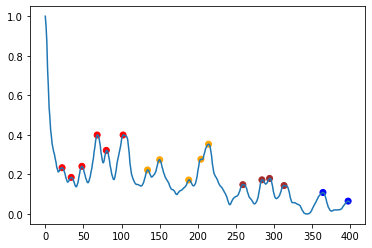

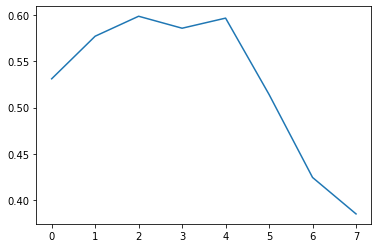

24.000000 - 51.000000
star id: tf.Tensor([b'KIC10080943'], shape=(1,), dtype=string)
Target 52 t1 24 t2 51 flag False


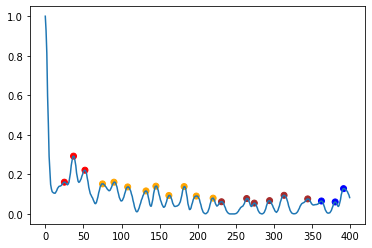

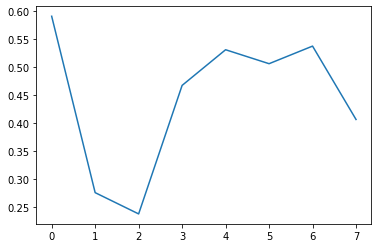

83.000000 - 73.000000
star id: tf.Tensor([b'HD15082'], shape=(1,), dtype=string)
Target 80 t1 83 t2 73 flag True


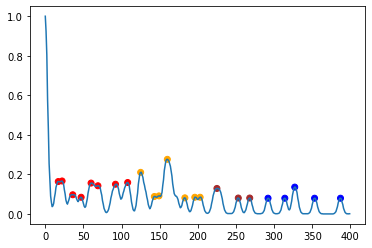

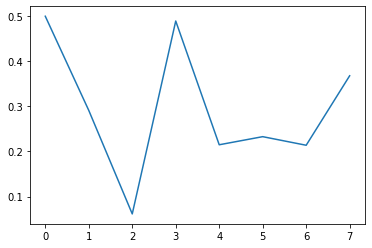

40.000000 - 74.000000
star id: tf.Tensor([b'kic10661783'], shape=(1,), dtype=string)
Target 39 t1 40 t2 74 flag True


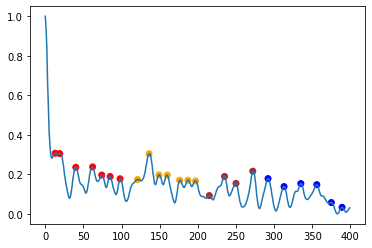

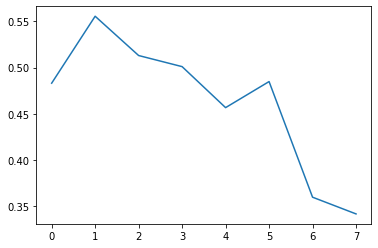

34.000000 - 66.000000
star id: tf.Tensor([b'KIC9851944'], shape=(1,), dtype=string)
Target 26 t1 34 t2 66 flag True


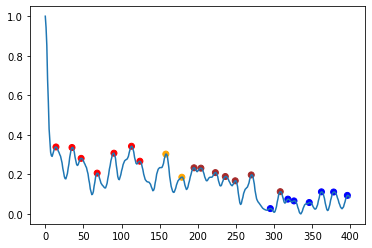

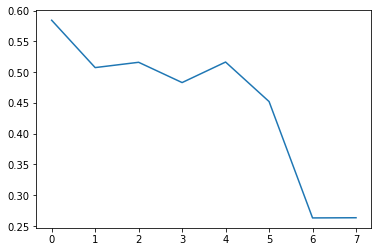

23.000000 - 46.000000
star id: tf.Tensor([b'HD172189'], shape=(1,), dtype=string)
Target 19 t1 23 t2 46 flag True


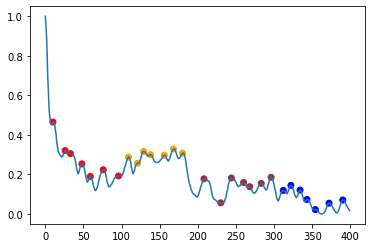

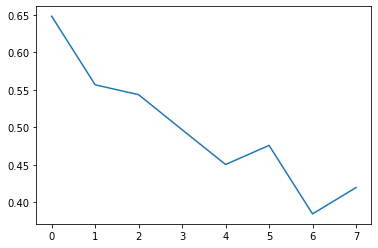

39.000000 - 21.000000
star id: tf.Tensor([b'CID105906206'], shape=(1,), dtype=string)
Target 20 t1 39 t2 21 flag False


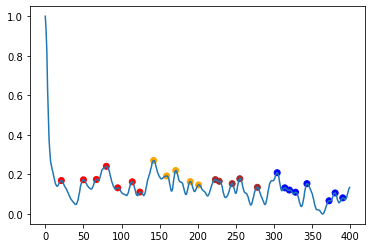

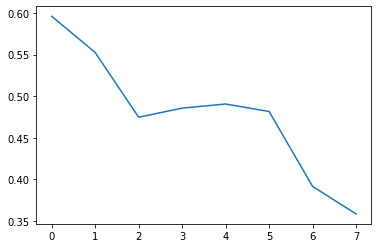

34.000000 - 21.000000
star id: tf.Tensor([b'HD159561'], shape=(1,), dtype=string)
Target 38 t1 34 t2 21 flag True


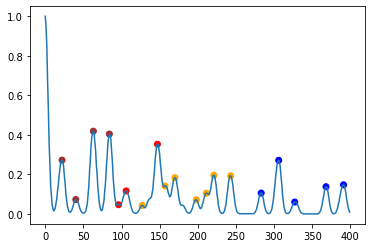

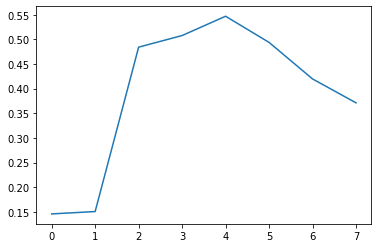

73.000000 - 36.000000
star id: tf.Tensor([b'kic4544587'], shape=(1,), dtype=string)
Target 74 t1 73 t2 36 flag True


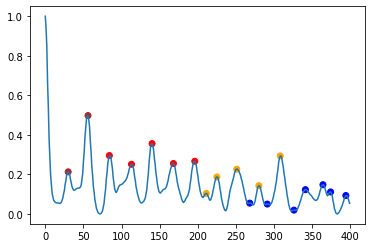

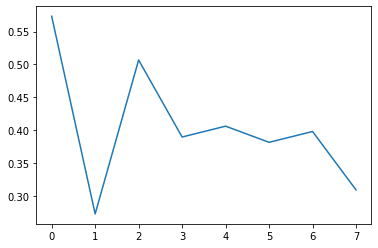

34.000000 - 23.000000
star id: tf.Tensor([b'KIC8262223'], shape=(1,), dtype=string)
Target 77 t1 34 t2 23 flag True


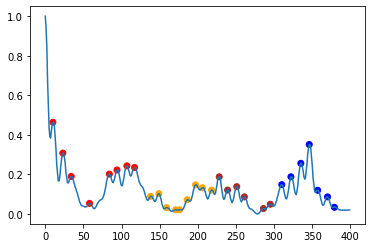

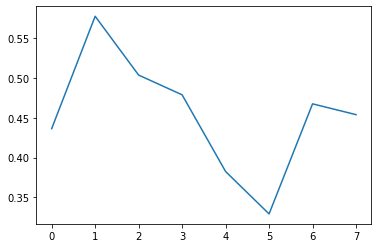

23.000000 - 78.000000
star id: tf.Tensor([b'KIC3858884'], shape=(1,), dtype=string)
Target 29 t1 23 t2 78 flag True


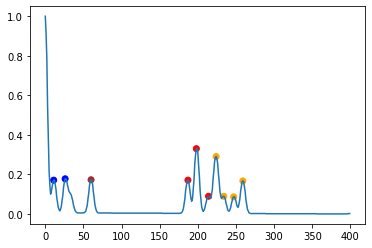

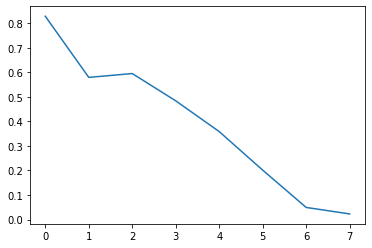

49.000000 - 73.000000
star id: tf.Tensor([b'CID100866999'], shape=(1,), dtype=string)
Target 56 t1 49 t2 73 flag True


In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Save results and predictions
gmm_clust_stds = []
gmm_peaks = []
gmm_clust_minmax = []
y_mod = []
is_multiple = []
peaks_clust_top1 = []
peaks_clust_top2 = []
top1_gr_top2 = []
star_ids = []
_silhouette_avg = []
aux_v = []
for star in df_start.take(11):  # take the 11 ds stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0]

    # Get vector corresponding to DFT
    aux_dft = star[1][0, :, 1].numpy()
    aux_ac = star[1][0, :, 0].numpy()
    # aux = np.divide(aux_ac, aux_dft, out=np.zeros_like(aux_ac), where=aux_dft!=0)
    # aux_v.append(aux)
    aux = aux_ac

    # Get all peaks
    peaks, peaks_pos = find_peaks(aux, height=0.0, distance=5)
    peaks_width = peak_widths(aux, peaks)
    peaks_sorted_by_prob = np.sort(aux[peaks])[::-1]

    # Adjust mixture of gaussians on peaks and hegight
    peaks_clust = np.vstack((peaks, peaks_pos["peak_heights"])).T
    # Fit model
    gmmModel = GaussianMixture(
        n_components=4, covariance_type="full", random_state=123
    ).fit(peaks_clust)
    # Plot
    colors = ["red", "green", "blue", "purple", "orange", "brown"]
    plt.scatter(
        peaks,
        peaks_pos["peak_heights"],
        c=gmmModel.predict(peaks_clust),
        cmap=matplotlib.colors.ListedColormap(colors),
    )
    plt.plot(aux)
    plt.show()

    si_coef = []
    n_components = np.arange(2, 10)
    for n_c in n_components:

        model = GaussianMixture(n_c, covariance_type="full", random_state=0).fit(
            peaks_clust
        )
        cluster_labels = model.predict(peaks_clust)
        silhouette_avg = silhouette_score(peaks_clust, cluster_labels)
        si_coef.append(silhouette_avg)
        # print("For n_clusters =", n_c, "The average silhouette_score is :", silhouette_avg)
    plt.plot(si_coef)
    plt.show()

    # Get star info to create a y_label
    _star_id = star[0].numpy()[0].decode("utf-8")
    _top1 = df[df["id"] == _star_id]["top1"].values[0]
    _target = df[df["id"] == _star_id]["dnu-target"].values[0]

    # Check if top-1 and top-2 is a multiple
    t1 = df[df["id"] == _star_id]["top1"].values[0]
    t2 = df[df["id"] == _star_id]["top2"].values[0]
    print("%f - %f" % (t1, t2))
    mult = -1
    if t1 > t2:
        mult = t1 % t2
    else:
        mult = t2 % t1
    is_multiple.append(mult < 5)

    if np.abs(_target - t1) < np.abs(_target - t2):
        y_mod.append(True)
    else:
        y_mod.append(False)

    print("star id: %s" % star[0])
    print(
        "Target",
        _target,
        "t1",
        t1,
        "t2",
        t2,
        "flag",
        np.abs(_target - t1) < np.abs(_target - t2),
    )

    # Add std of covariances
    gmm_clust_stds.append(np.std(gmmModel.covariances_))
    gmm_peaks.append(peaks.shape[0])
    gb = pd.DataFrame({"peaks": peaks, "clust": gmmModel.predict(peaks_clust)}).groupby(
        ["clust"]
    )
    gmm_clust_minmax.append(
        np.mean(np.abs(gb.agg([np.min]).values - gb.agg([np.max]).values)[0])
    )

    gb_agg = gb.agg(np.sum)
    t1_clust = gmmModel.predict(np.asarray([t1, 1]).reshape(-1, 2))
    t2_clust = gmmModel.predict(np.asarray([t2, 1]).reshape(-1, 2))
    peaks_clust_top1.append(gb_agg.iloc[t1_clust].values[0][0])
    peaks_clust_top2.append(gb_agg.iloc[t2_clust].values[0][0])
    top1_gr_top2.append(t1 > t2)

    star_ids.append(_star_id)

    _silhouette_avg.append(np.argmax(np.diff(si_coef)))

    print("=================================================")

In [23]:
gmm_clust_data = pd.DataFrame(
    {
        "clust_cov_stds": gmm_clust_stds,
        "peaks_number": gmm_peaks,
        "std_min_max_clust": gmm_clust_minmax,
        "has_mult": is_multiple,
        "peaks_clust_top1": peaks_clust_top1,
        "peaks_clust_top2": peaks_clust_top2,
        "top1_gr_top2": top1_gr_top2,
        "star_ids": star_ids,
        "y_mod": y_mod,
        "sil": _silhouette_avg,
    }
)

gmm_clust_data

clust_cov_stds  peaks_number  std_min_max_clust  has_mult  \
0       290.242109            17               80.0      True   
1       764.092344            21               27.0     False   
2       390.759277            23               91.0     False   
3       412.501297            24               85.0     False   
4       507.525698            23              110.0      True   
5       334.674383            28               86.0     False   
6       363.381708            25              103.0     False   
7       613.308677            19               51.0      True   
8       619.507255            19              112.0     False   
9       478.071915            30              107.0     False   
10       58.858027            10               27.0     False   

    peaks_clust_top1  peaks_clust_top2  top1_gr_top2      star_ids  y_mod  sil  
0                890               890         False   KIC10080943  False    0  
1                114               114          True       HD15082   True    2  
2               1159              1159         False   kic10661783   True    2  
3               1126              1126         False    KIC9851944   True    0  
4                491               491         False      HD172189   True    3  
5                348               348          True  CID105906206  False    6  
6               2751              2751          True      HD159561   True    2  
7                209               209          True    kic4544587   True    1  
8                701               701          True    KIC8262223   True    1  
9                527               527         False    KIC3858884   True    0  
10               599               599         False  CID100866999   True    1

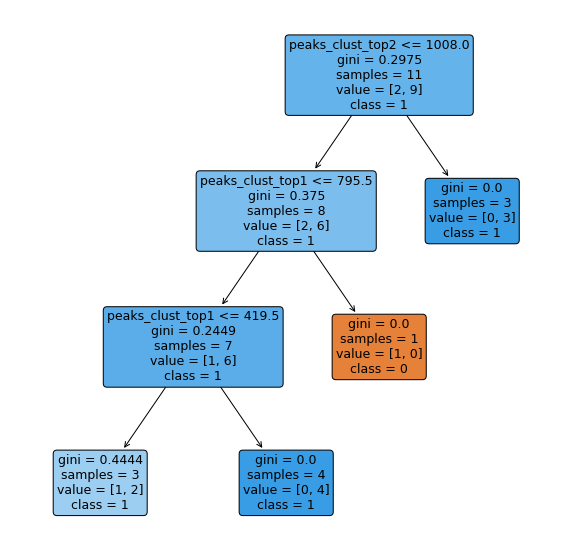

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

selected_vars_gmm = ["peaks_clust_top1", "peaks_clust_top2"]

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(gmm_clust_data[selected_vars_gmm], gmm_clust_data[["y_mod"]])
plt.figure(figsize=(10, 10))
dec_tree = plot_tree(
    decision_tree=clf,
    feature_names=selected_vars_gmm,
    class_names=["0", "1"],
    filled=True,
    precision=4,
    rounded=True,
)

In [25]:
confusion_matrix(y_mod, clf.predict(gmm_clust_data[selected_vars_gmm]))

array([[1, 1],
       [0, 9]])

In [26]:
print(classification_report(y_mod, clf.predict(gmm_clust_data[selected_vars_gmm])))

              precision    recall  f1-score   support

       False       1.00      0.50      0.67         2
        True       0.90      1.00      0.95         9

    accuracy                           0.91        11
   macro avg       0.95      0.75      0.81        11
weighted avg       0.92      0.91      0.90        11



HD159561
CID105906206
HD15082
KIC9851944
kic4544587
CID100866999
KIC3858884
KIC8262223
kic10661783
HD172189
KIC10080943


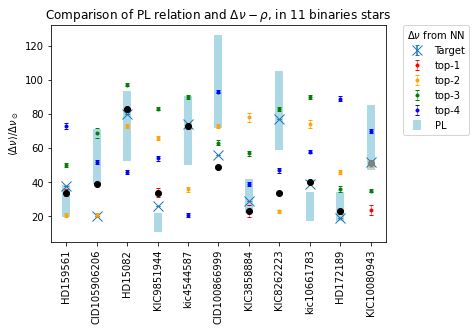

In [27]:
# Prepare data plot
targets = []
inferences = []
inferences_top2 = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    inferences_top2.append(results[tess_id]["top2"])


for i, txt in enumerate(ids):
    print(txt)
    # get prediction
    flag = clf.predict(
        gmm_clust_data[gmm_clust_data["star_ids"] == ids[i]][selected_vars_gmm]
    )
    if flag:
        plt.scatter(ids[i], inferences[i], color="black", zorder=1000)
    else:
        plt.scatter(ids[i], inferences_top2[i], color="grey", zorder=1000)

plt.errorbar(
    df["id"], df["dnu-target"], 0, fmt="x", markersize=10, capsize=2, label="Target"
)

plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
plt.errorbar(
    df["id"],
    df["top4"],
    df["e-top4"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="blue",
    label="top-4",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)

plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 11 binaries stars")
# plt.ylim(0, 1.0)
plt.show()

In [28]:
df

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0       HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   
1   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
2        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
3     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
4     kic4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
5   CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   
6     KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   
7     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
8    kic10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
9       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
10   KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   

      e-top4  ...  rho-target  e-rho-target   rho-top1  e-rho-top1   rho-top2  \
0   1.730440  ...    0.123968      0.039335  0.0990225    0.031506  0.0374136   
1   1.141167  ...   0.0339021      0.010961   0.130646    0.041429  0.0374136   
2   1.144795  ...    0.557684      0.174734   0.600737    0.188156   0.463509   
3   1.387807  ...    0.057596      0.018463  0.0990225    0.031506   0.378116   
4   1.116072  ...    0.476425      0.149399   0.463509    0.145372   0.111142   
5   0.980278  ...    0.271323      0.085418   0.207177    0.065380   0.463509   
6   1.314869  ...   0.0718109      0.022947  0.0449611    0.014468    0.52988   
7   1.311323  ...    0.516247      0.161815  0.0990225    0.031506  0.0449611   
8   1.154284  ...    0.130646      0.041429   0.137502    0.043577   0.476425   
9   1.336333  ...   0.0305653      0.009899  0.0449611    0.014468   0.182355   
10  1.046125  ...      0.2336      0.073637  0.0489974    0.015746   0.224615   

    e-rho-top2  rho-top3  e-rho-top3   rho-top4  e-rho-top4  
0     0.012076  0.215807    0.068077   0.463509    0.145372  
1     0.012076  0.413639    0.129821     0.2336    0.073637  
2     0.145372  0.823048    0.257471   0.182355    0.057618  
3     0.118742  0.600737    0.188156   0.252105    0.079417  
4     0.035312  0.707483    0.221437  0.0374136    0.012076  
5     0.145372  0.344203    0.108163   0.755931    0.236542  
6     0.166065  0.281199    0.088501   0.130646    0.041429  
7     0.014468  0.600737    0.188156   0.190451    0.060151  
8     0.149399  0.707483    0.221437   0.291253    0.091640  
9     0.057618  0.111142    0.035312   0.691694    0.216514  
10    0.070830  0.104994    0.033382   0.425838    0.133625  

[11 rows x 24 columns]

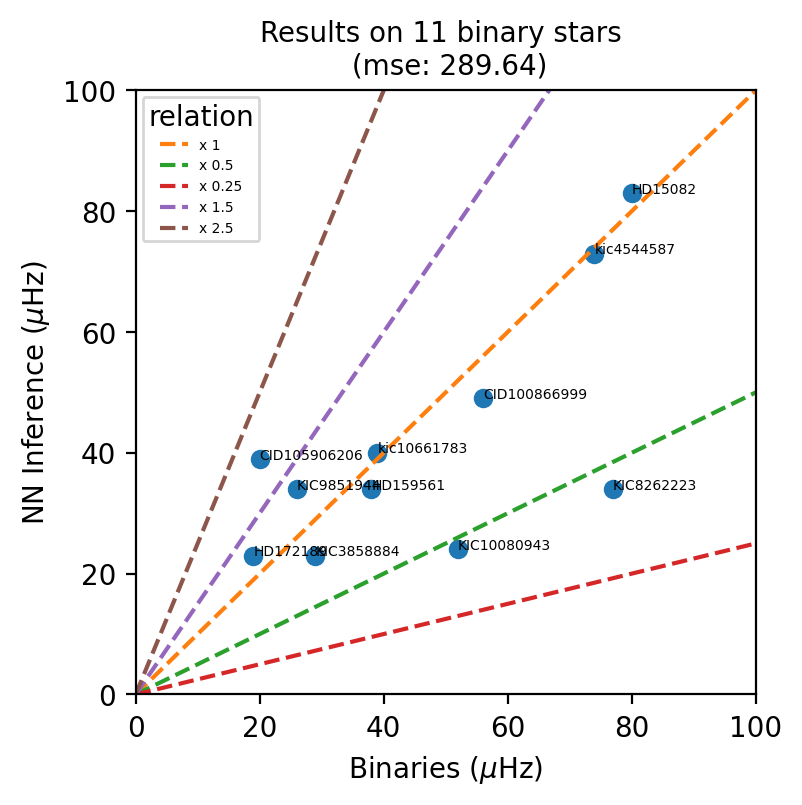

In [29]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o")  # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("Binaries ($\mu$Hz)")
plt.ylabel("NN Inference ($\mu$Hz)")
plt.title(
    "Results on 11 binary stars \n (mse: %s)"
    % np.round(np.mean(np.power(np.asarray(targets) - np.asarray(inferences), 2)), 2),
    fontsize=10,
)
plt.show()
plt.show()

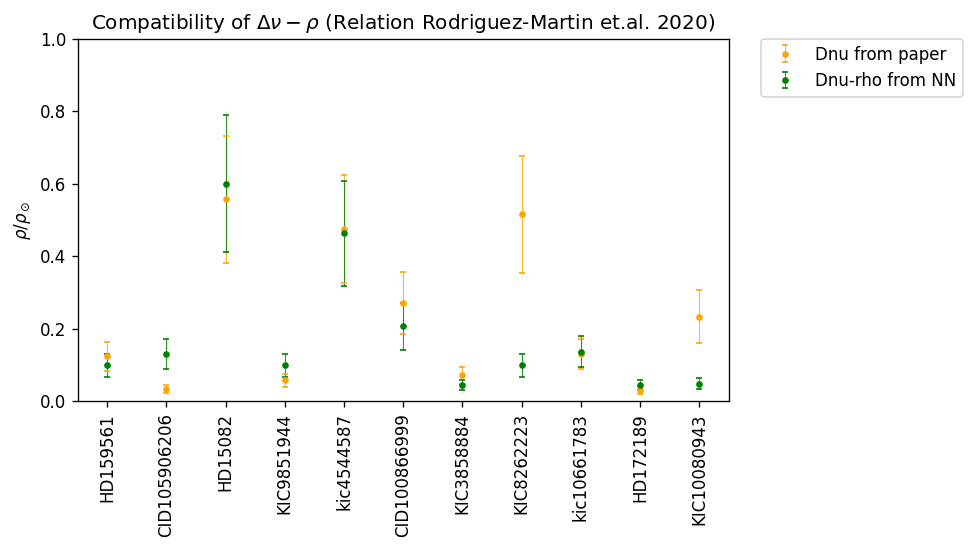

In [30]:
plt.subplots(1, figsize=(7, 4), dpi=120)

plt.errorbar(
    ids,
    get_rho(np.asarray(targets) / dnu_sun),
    rho_error(np.float64(np.asarray(targets) / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="Dnu from paper",
)

plt.errorbar(
    ids,
    get_rho(np.asarray(inferences) / dnu_sun),
    rho_error(np.float64(np.asarray(inferences) / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="Dnu-rho from NN",
)

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
# plt.gca().add_artist(legend1)

plt.ylabel("$\\rho / \\rho_\\odot$")
plt.title("Compatibility of $\Delta\\nu-\\rho$ (Relation Rodriguez-Martin et.al. 2020)")
plt.ylim(0, 1.0)
plt.show()

In [31]:
results_binaries = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "e-dnu-target",
        "dnu-from-P",
        "e-dnu-from-P",
        "best-top",
        "e-best-top",
        "ktop",
    ]
)

for index, row in df.iterrows():
    print("Proccessing star %s" % row["id"])
    print("PL[%f,%f]" % (row["dnu-from-P-up"], row["dnu-from-P-down"]))
    # Top index to search on
    top_indexs = ["top1", "top2", "top3"]
    best = np.nan  # empty on start
    # Center of PL window
    central_pl_window = row["dnu-from-P-up"] - (
        (row["dnu-from-P-up"] - row["dnu-from-P-down"]) / 2
    )
    # Check predictions indise L window
    inside_pl_window = []
    for top_index in top_indexs:
        flag_full_inside = (
            row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"]
        ) & (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
        flag_partial = (
            (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
            & (row[top_index] - row["e-%s" % (top_index)] <= row["dnu-from-P-up"])
        ) | (
            (row[top_index] + row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
            & (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"])
        )
        if flag_full_inside or flag_partial:
            inside_pl_window.append(top_index)
    print("   =>Inside PL window: %s" % inside_pl_window)

    if (len(inside_pl_window) > 0) and (not np.isnan(row["dnu-from-P-up"])):
        print("=>", inside_pl_window)
        top_index = inside_pl_window[0]  # Get most probable from NN

        # Get best
        best = row["%s" % (top_index)]
        results_binaries.loc[len(results_binaries)] = [
            row["id"],
            row["dnu-target"],
            0.23,
            (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
            row["dnu-from-P-up"]
            - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
            best,
            row["e-%s" % top_index],
            top_index,
        ]
    else:
        # Get closest inference to the center of PL window
        top_index = np.argmin(
            [np.abs(row[top_index] - central_pl_window) for top_index in top_indexs]
        )
        # Check if predictions is not inside window
        # Get best
        best = row["top%s" % (top_index + 1)]
        results_binaries.loc[len(results_binaries)] = [
            row["id"],
            row["dnu-target"],
            0.23,
            (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
            row["dnu-from-P-up"]
            - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
            best,
            row["e-top%s" % (top_index + 1)],
            top_index,
        ]

Proccessing star HD159561
PL[38.537790,19.870672]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star CID105906206
PL[71.165271,38.907339]
   =>Inside PL window: ['top1', 'top3']
=> ['top1', 'top3']
Proccessing star HD15082
PL[93.569327,52.252186]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star KIC9851944
PL[22.013591,10.647775]
   =>Inside PL window: []
Proccessing star kic4544587
PL[90.413084,50.365296]
   =>Inside PL window: ['top1', 'top3']
=> ['top1', 'top3']
Proccessing star CID100866999
PL[126.330451,71.900529]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star KIC3858884
PL[41.985046,21.843379]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing star KIC8262223
PL[104.970838,59.080258]
   =>Inside PL window: ['top3']
=> ['top3']
Proccessing star kic10661783
PL[34.545158,17.603175]
   =>Inside PL window: []
Proccessing star HD172189
PL[34.079468,17.340043]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing 

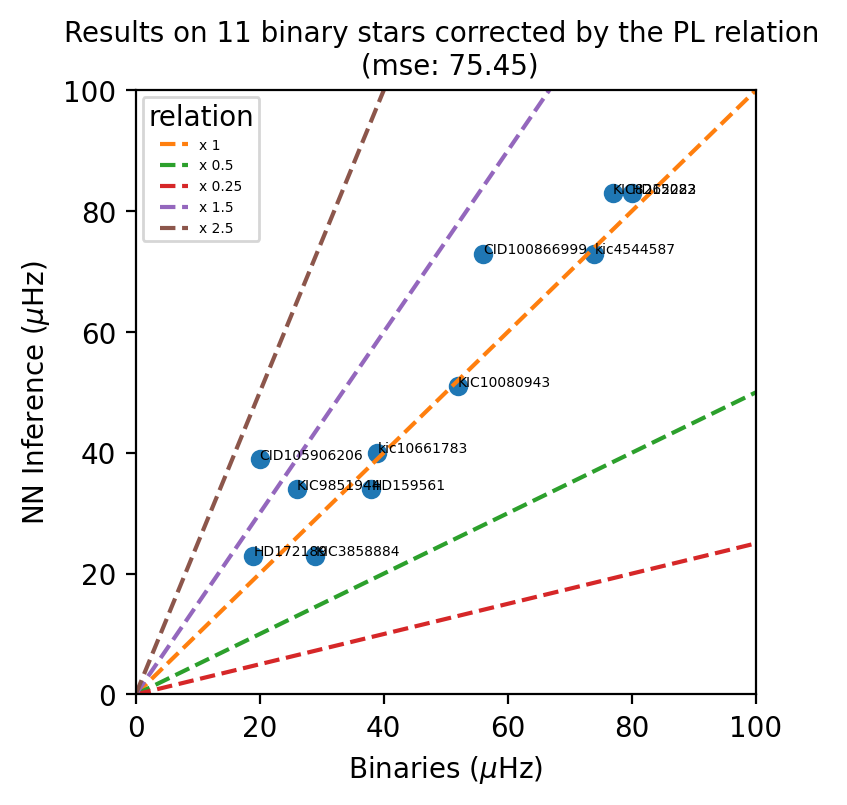

In [32]:
# Prepare data plot
targets = results_binaries["dnu-target"]
inferences = results_binaries["best-top"]
ids = results_binaries["id"]

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o")  # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("Binaries ($\mu$Hz)")
plt.ylabel("NN Inference ($\mu$Hz)")
plt.title(
    "Results on 11 binary stars corrected by the PL relation \n (mse: %s)"
    % np.round(np.mean(np.power(np.asarray(targets) - np.asarray(inferences), 2)), 2),
    fontsize=10,
)
plt.show()

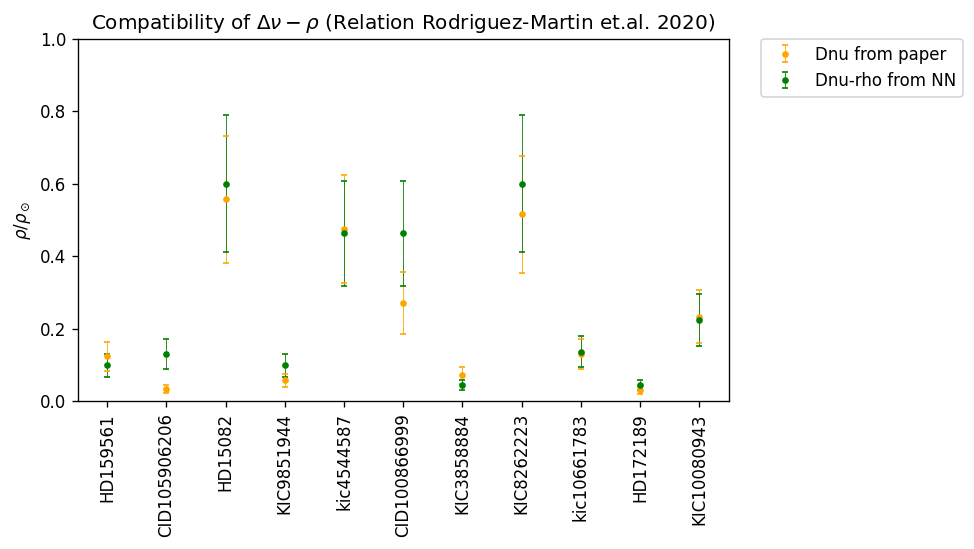

In [33]:
plt.subplots(1, figsize=(7, 4), dpi=120)

plt.errorbar(
    ids,
    get_rho(targets / dnu_sun),
    rho_error(np.float64(targets / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="Dnu from paper",
)

plt.errorbar(
    ids,
    get_rho(inferences / dnu_sun),
    rho_error(np.float64(inferences / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="Dnu-rho from NN",
)

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
# plt.gca().add_artist(legend1)

plt.ylabel("$\\rho / \\rho_\\odot$")
plt.title("Compatibility of $\Delta\\nu-\\rho$ (Relation Rodriguez-Martin et.al. 2020)")
plt.ylim(0, 1)
plt.show()

## Read and process Bedding stars 

In [34]:
"""
df_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)
rows = []
for i,row in pd.io.parsers.read_csv("../data/bedding/parameters.csv", sep=",", header=1, names=["star", "L", "Teff", "dnu"]).iterrows():
    print(row)
    L = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["L"].values[0]
    Teff = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["Teff"].values[0]
    rows.append([row["star"], L, Teff, row["dnu"]])
df_aux = pd.DataFrame(rows, columns = ['star', 'L', "Teff", "dnu"])  
print(df_aux.head(57))
df_aux.to_csv("../data/bedding/parameters.csv", index=False, header=True)
"""

'\ndf_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)\nrows = []\nfor i,row in pd.io.parsers.read_csv("../data/bedding/parameters.csv", sep=",", header=1, names=["star", "L", "Teff", "dnu"]).iterrows():\n    print(row)\n    L = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["L"].values[0]\n    Teff = df_att[df_att.TIC.eq(str(int(row["star"].split("-")[2])))]["Teff"].values[0]\n    rows.append([row["star"], L, Teff, row["dnu"]])\ndf_aux = pd.DataFrame(rows, columns = [\'star\', \'L\', "Teff", "dnu"])  \nprint(df_aux.head(57))\ndf_aux.to_csv("../data/bedding/parameters.csv", index=False, header=True)\n'

In [35]:
df_att = pd.io.parsers.read_csv("../data/bedding/bedding.csv", sep=",", index_col=0)
df_att

HD             Name         TIC      V    Teff      L  e.L.   rho  \
1     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
2     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
3    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
4    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
5    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
6    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
7    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
8    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
9    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
10   24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
11   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
12   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
13   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
14   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
15   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
16   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
17   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
18   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
19   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
20   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
21   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
22   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
23   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
24   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
25   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
26   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
27   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
28   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
29   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
30   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
31   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
32   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
33   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
34   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
35   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
36   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
37   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
38   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
39   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
40   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
41   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
42   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
43   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
44   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
45   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
46   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
47  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
48  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
49  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
50  290750.0              NaN    11199304   9.77  9170.0  19

In [36]:
df_att["logg"] = np.nan
df_att["Teff_mast"] = np.nan
df_att["e_logg"] = np.nan
df_att["e_Teff_mast"] = np.nan
df_att["stellar_radius"] = np.nan
df_att["e_stellar_radius"] = np.nan

In [37]:
from astroquery.mast import Observations, Catalogs

for star_name in ["TIC %s" % str(e) for e in df_att[0:57]["TIC"].values]:
    break
    catalogTIC = Catalogs.query_object(
        star_name, radius=0.00033, catalog="TIC", mission="TESS", data_release=1
    )
    print(catalogTIC["Teff", "logg"])
    try:
        df_att.loc[df_att.TIC == star_name.split(" ")[1], ["logg"]] = catalogTIC["logg"]
        df_att.loc[df_att.TIC == star_name.split(" ")[1], ["e_logg"]] = catalogTIC[
            "e_logg"
        ]
        df_att.loc[df_att.TIC == star_name.split(" ")[1], ["Teff_mast"]] = catalogTIC[
            "Teff"
        ]
        df_att.loc[df_att.TIC == star_name.split(" ")[1], ["e_Teff_mast"]] = catalogTIC[
            "e_Teff"
        ]
        df_att.loc[
            df_att.TIC == star_name.split(" ")[1], ["stellar_radius"]
        ] = catalogTIC["rad"]
        df_att.loc[
            df_att.TIC == star_name.split(" ")[1], ["e_stellar_radius"]
        ] = catalogTIC["e_rad"]
    except:
        print("Problems in %s" % star_name)

In [38]:
"""
# I add data to the 9147509  star.
df_att.loc[df_att.TIC == "9147509", ["logg"]] = 4.2535
df_att.loc[df_att.TIC == "9147509", ["e_logg"]] = 0.0743759
df_att.loc[df_att.TIC == "9147509", ["Teff_mast"]] = 7886
df_att.loc[df_att.TIC == "9147509", ["e_Teff_mast"]] = 165.597
df_att.loc[df_att.TIC == "9147509", ["stellar_radius"]] = 1.69572
df_att.loc[df_att.TIC == "9147509", ["e_stellar_radius"]] = 0.0493341

    
plt.scatter(df_att["logg"], df_att["Dnu"])
plt.xlabel("logg")
plt.ylabel("Dnu")
plt.show()

plt.scatter(df_att["Teff"], df_att["Teff_mast"])
plt.xlabel("Teff")
plt.ylabel("Teff_mast")
plt.show()

df_att.to_csv("../data/bedding/bedding_teff_logg_rad.csv", index=False, header=True)
"""
df_att = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
df_att["dnu_muhz"] = df_att["Dnu"] / 0.0864

In [39]:
# Save results and predictions
results = {}
for star in df_bedding.take(57):  # take the stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0] / 0.0864
    # Save results
    if star[0].numpy()[0].decode("utf-8") not in results:
        results[star[0].numpy()[0].decode("utf-8")] = {
            "dnu-target": target,
        }

    # Calculate gradient explainers and shap values
    shap_values, indexes = e.shap_values(
        star[1].numpy(), nsamples=100, ranked_outputs=4
    )

    probs = sepconv_mod.predict_proba(star[1])[0]
    peaks, _ = find_peaks(probs, height=0, distance=10)
    peaks_width = peak_widths(probs, peaks)
    peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]
    best_peak, best_peak_width = get_peak_width(
        0, peaks, peaks_width, peaks_sorted_by_prob
    )

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top1"] = np.where(
        probs == peaks_sorted_by_prob[0]
    )[0][0]
    # Get error
    results[star[0].numpy()[0].decode("utf-8")]["e-top1"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top2"] = np.where(
        probs == peaks_sorted_by_prob[1]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(
        1, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["e-top2"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top3"] = np.where(
        probs == peaks_sorted_by_prob[2]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(
        2, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["e-top3"] = best_peak_width

    # save top-k
    results[star[0].numpy()[0].decode("utf-8")]["top4"] = np.where(
        probs == peaks_sorted_by_prob[3]
    )[0][0]
    # Get error
    best_peak, best_peak_width = get_peak_width(
        3, peaks, peaks_width, peaks_sorted_by_prob
    )
    results[star[0].numpy()[0].decode("utf-8")]["e-top4"] = best_peak_width

    L = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["L"].values
    Teff = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["Teff"].values
    if len(Teff) > 0 and not np.isnan(Teff):

        l_teff_topk1 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top1"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk2 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top2"], Teff]
            ).reshape(1, 2)
        )[0]
        l_teff_topk3 = gam_teff_dnu.predict(
            np.asarray(
                [results[star[0].numpy()[0].decode("utf-8")]["top3"], Teff]
            ).reshape(1, 2)
        )[0]

        # Get L errors
        ls_teff_topks = [l_teff_topk1, l_teff_topk2, l_teff_topk3]
        # Get L errors
        errors = [
            round(np.power(l_teff_topk1 - L[0], 2), 2),
            round(np.power(l_teff_topk2 - L[0], 2), 2),
            round(np.power(l_teff_topk3 - L[0], 2), 2),
        ]
        i = np.argmin(errors)  # Get min error position
        L = ls_teff_topks[i]  # Get most probable L from the model

        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)

        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_up) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down-fromstarmodel"] = (
            get_dnu_from_rho(rho_q_down) * dnu_sun
        )
    else:
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-up-fromstarmodel"
        ] = np.nan
        results[star[0].numpy()[0].decode("utf-8")][
            "dnu-from-P-down-fromstarmodel"
        ] = np.nan

    # Get L from Teff,Dnu model
    L = df_att[
        df_att.TIC.eq(str(int(star[0].numpy()[0].decode("utf-8").split("-")[2])))
    ]["L"].values
    if len(L) > 0 and not np.isnan(L):
        P = get_P(np.log10(L))
        p_e = p_error(log_L=np.log10(L))
        rho_q_up = get_rho_from_P(P - p_e, Q=0.042)
        rho_q_down = get_rho_from_P(P + p_e, Q=0.033)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = (
            get_dnu_from_rho(rho_q_up[0]) * dnu_sun
        )
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = (
            get_dnu_from_rho(rho_q_down[0]) * dnu_sun
        )
    else:
        print(star[0].numpy()[0].decode("utf-8"))
        print(L)
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-up"] = np.nan
        results[star[0].numpy()[0].decode("utf-8")]["dnu-from-P-down"] = np.nan

    if False:
        x = np.arange(0, 100, 0.25)  # x axis from 0 to 100
        plt.plot(x, star[1][0, :, 0], label="dft", color="blue")
        # plt.plot(x, star[1][0, :, 1], label="hod", color="orange", alpha=0.5)
        plt.plot(x, star[1][0, :, 1], label="ac", color="green")
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top1"],
            label="top1",
            linestyle="dashed",
            linewidth=3,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top2"],
            label="top2",
            linestyle="dashed",
            linewidth=2,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top3"],
            label="top3",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(
            x=results[star[0].numpy()[0].decode("utf-8")]["top4"],
            label="top4",
            linestyle="dashed",
            linewidth=1,
        )
        plt.axvline(x=target, label="target", color="red")
        plt.title(star[0].numpy()[0].decode("utf-8"))
        plt.legend(title="Channels")
        plt.show()

 the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

In [40]:
df = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "top1",
        "e-top1",
        "top2",
        "e-top2",
        "top3",
        "e-top3",
        "top4",
        "e-top4",
        "dnu-from-P-up-fromstarmodel",
        "dnu-from-P-down-fromstarmodel",
        "dnu-from-P-up",
        "dnu-from-P-down",
    ]
)
for i, id in enumerate(results):
    df.loc[i] = [
        id,
        results[id]["dnu-target"],
        results[id]["top1"],
        results[id]["e-top1"],
        results[id]["top2"],
        results[id]["e-top2"],
        results[id]["top3"],
        results[id]["e-top3"],
        results[id]["top4"],
        results[id]["e-top4"],
        results[id]["dnu-from-P-up-fromstarmodel"],
        results[id]["dnu-from-P-down-fromstarmodel"],
        results[id]["dnu-from-P-up"],
        results[id]["dnu-from-P-down"],
    ]
df

id  dnu-target top1  \
0   tess2018263035959-s0003-0000000043363194-0123-...   69.444444   77   
1   tess2018319095959-s0005-0000000316920092-0125-...   69.444444   35   
2   tess2018319095959-s0005-0000000306773428-0125-...   81.018519   36   
3   tess2018319095959-s0005-0000000009147509-0125-...   69.444444   69   
4   tess2018349182459-s0006-0000000011361473-0126-...   81.018519   44   
5   tess2018263035959-s0003-0000000150272131-0123-...   81.018519   40   
6   tess2018349182459-s0006-0000000282265535-0126-...   69.444444   75   
7   tess2019058134432-s0009-0000000287347434-0139-...   81.018519   78   
8   tess2018319095959-s0005-0000000242944780-0125-...   81.018519   40   
9   tess2018319095959-s0005-0000000031475829-0125-...   81.018519   40   
10  tess2018319095959-s0005-0000000100531058-0125-...   69.444444   38   
11  tess2018319095959-s0005-0000000000589826-0125-...   69.444444   36   
12  tess2018263035959-s0003-0000000122686610-0123-...   69.444444   73   
13  tess2018319095959-s0005-0000000143381070-0125-...   81.018519   44   
14  tess2018319095959-s0005-0000000255548143-0125-...   69.444444   75   
15  tess2019058134432-s0009-0000000388351327-0139-...   81.018519   73   
16  tess2019058134432-s0009-0000000463556278-0139-...   81.018519   40   
17  tess2018234235059-s0002-0000000281499618-0121-...   81.018519   69   
18  tess2018349182459-s0006-0000000408906554-0126-...   81.018519   77   
19  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   81   
20  tess2018319095959-s0005-0000000034197596-0125-...   69.444444   36   
21  tess2019006130736-s0007-0000000278179191-0131-...   69.444444   38   
22  tess2018319095959-s0005-0000000246902545-0125-...   69.444444   33   
23  tess2018349182459-s0006-0000000148228220-0126-...   81.018519   81   
24  tess2018319095959-s0005-0000000071134596-0125-...   81.018519   42   
25  tess2018319095959-s0005-0000000349645354-0125-...   57.870370   27   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   71   
27  tess2018234235059-s0002-0000000229139161-0121-...   69.444444   40   
28  tess2019006130736-s0007-0000000270577175-0131-...   69.444444   38   
29  tess2018234235059-s0002-0000000327996759-0121-...   69.444444   42   
30  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   79   
31  tess2018349182459-s0006-0000000034737955-0126-...   69.444444   68   
32  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   36   
33  tess2018263035959-s0003-0000000122615966-0123-...   57.870370   32   
34  tess2018263035959-s0003-0000000231014033-0123-...   81.018519   37   
35  tess2018349182459-s0006-0000000032763133-0126-...   81.018519   44   
36  tess2018349182459-s0006-0000000011199304-0126-...   57.870370   32   
37  tess2019006130736-s0007-0000000112484997-0131-...   69.444444   36   
38  tess2019006130736-s0007-0000000284348793-0131-...   81.018519   34   
39  tess2018234235059-s0002-0000000316806320-0121-...   57.870370   27   
40  tess2018234235059-s0002-0000000224284988-0121-...   57.870370   67   
41  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   30   
42  tess2019058134432-s0009-0000000260161111-0139-...   81.018519   80   
43  tess2018349182459-s0006-0000000124381332-0126-...   81.018519   41   
44  tess2018349182459-s0006-0000000124429243-0126-...   69.444444   35   
45  tess2018349182459-s0006-0000000037498433-0126-...   81.018519   30   
46  tess2018319095959-s0005-0000000259675399-0125-...   69.444444   30   
47  tess2018319095959-s0005-0000000431695696-0125-...   81.018519   40   
48  tess2018319095959-s0005-0000000044645679-0125-...   69.444444   39   
49  tess2019032160000-s0008-0000000176400189-0136-...   69.444444   32   
50  tess2018349182459-s0006-0000000117766204-0126-...   69.444444   37   
51  tess2019032160000-s0008-0000000340358522-0136-...   81.018519   38   
52  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   73   
53  tess2018263035959-s0003-0000000159895674-0123-...  

In [41]:
stars_fundamental_mode = [
    "tess2018263035959-s0003-0000000159895674-0123-s_lc_det",
    "tess2018319095959-s0005-0000000044645679-0125-s_lc_det",
    "tess2018319095959-s0005-0000000459942890-0125-s_lc_det",
    "tess2018319095959-s0005-0000000009147509-0125-s_lc_det",
    "tess2018319095959-s0005-0000000316920092-0125-s_lc_det",
    "tess2018292075959-s0004-0000000274038922-0124-s_lc_det",
    "tess2018349182459-s0006-0000000282265535-0126-s_lc_det",
    "tess2018349182459-s0006-0000000408906554-0126-s_lc_det",
    "tess2018319095959-s0005-0000000255548143-0125-s_lc_det",
    "tess2018349182459-s0006-0000000172193026-0126-s_lc_det",
    "tess2018349182459-s0006-0000000294157254-0126-s_lc_det",
    "tess2019058134432-s0009-0000000287347434-0139-s_lc_det",
    "tess2018349182459-s0006-0000000011361473-0126-s_lc_det",
    "tess2019058134432-s0009-0000000388351327-0139-s_lc_det",
    "tess2019032160000-s0008-0000000176400189-0136-s_lc_det",
    "tess2018263035959-s0003-0000000043363194-0123-s_lc_det",
    "tess2018234235059-s0002-0000000327996759-0121-s_lc_det",
    "tess2018234235059-s0002-0000000224284988-0121-s_lc_det",
    "tess2019032160000-s0008-0000000332516661-0136-s_lc_det",
]

In [42]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])

# Get inferenes "close" to targets and create a True/Flase flag
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
vals = np.asarray(targets, dtype=float)[sign == True]

# Get stars in stars_fundamental_mode list mode
list_stars_in_fundamental_model = [
    (i, i in stars_fundamental_mode) for i in df[sign]["id"].values
]
import pprint

print(pprint.pformat(list_stars_in_fundamental_model))

# Get percentage
print(
    "Percentage of stars radial mode in NN inference: %f"
    % (
        sum([i in stars_fundamental_mode for i in df[sign]["id"].values])
        / len(stars_fundamental_mode)
    )
)

[('tess2018263035959-s0003-0000000043363194-0123-s_lc_det', True),
 ('tess2018319095959-s0005-0000000009147509-0125-s_lc_det', True),
 ('tess2018349182459-s0006-0000000282265535-0126-s_lc_det', True),
 ('tess2019058134432-s0009-0000000287347434-0139-s_lc_det', True),
 ('tess2018263035959-s0003-0000000122686610-0123-s_lc_det', False),
 ('tess2018319095959-s0005-0000000255548143-0125-s_lc_det', True),
 ('tess2019058134432-s0009-0000000388351327-0139-s_lc_det', True),
 ('tess2018349182459-s0006-0000000408906554-0126-s_lc_det', True),
 ('tess2018292075959-s0004-0000000274038922-0124-s_lc_det', True),
 ('tess2018349182459-s0006-0000000148228220-0126-s_lc_det', False),
 ('tess2019169103026-s0013-0000000269792989-0146-s_lc_det', False),
 ('tess2018319095959-s0005-0000000024344701-0125-s_lc_det', False),
 ('tess2018349182459-s0006-0000000034737955-0126-s_lc_det', False),
 ('tess2018234235059-s0002-0000000224284988-0121-s_lc_det', True),
 ('tess2019058134432-s0009-0000000260161111-0139-s_lc_det

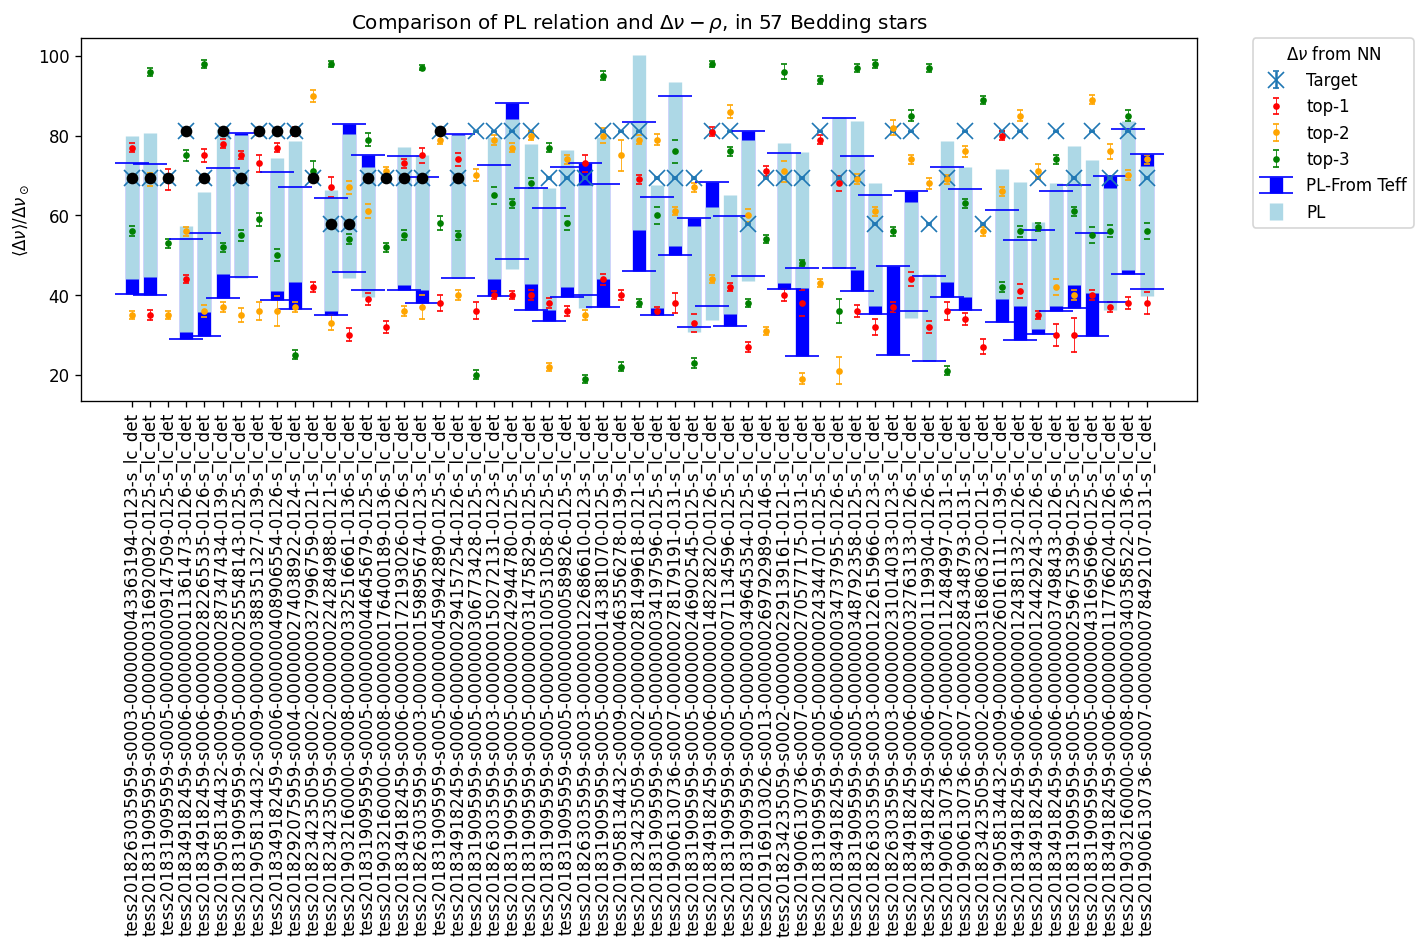

57


In [43]:
plt.subplots(1, figsize=(12, 4), dpi=120)

# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])

for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], targets[i], color="black", zorder=1000)


plt.errorbar(
    df["id"], df["dnu-target"], 0.23, fmt="x", markersize=10, capsize=2, label="Target"
)

plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)

plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)

plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)


plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 57 Bedding stars")
# plt.ylim(0, 1.0)
plt.show()
print(len(df.index))

81.000000 - 44.000000
star id: tf.Tensor([b'tess2018349182459-s0006-0000000148228220-0126-s_lc_det'], shape=(1,), dtype=string)
Target 81.01851851851852 t1 81 t2 44 flag True
32.000000 - 68.000000
star id: tf.Tensor([b'tess2018349182459-s0006-0000000011199304-0126-s_lc_det'], shape=(1,), dtype=string)
Target 57.87037037037037 t1 32 t2 68 flag False
40.000000 - 75.000000
star id: tf.Tensor([b'tess2019058134432-s0009-0000000463556278-0139-s_lc_det'], shape=(1,), dtype=string)
Target 81.01851851851852 t1 40 t2 75 flag False
32.000000 - 61.000000
star id: tf.Tensor([b'tess2018263035959-s0003-0000000122615966-0123-s_lc_det'], shape=(1,), dtype=string)
Target 57.87037037037037 t1 32 t2 61 flag False
38.000000 - 61.000000
star id: tf.Tensor([b'tess2019006130736-s0007-0000000278179191-0131-s_lc_det'], shape=(1,), dtype=string)
Target 69.44444444444444 t1 38 t2 61 flag False
75.000000 - 37.000000
star id: tf.Tensor([b'tess2018263035959-s0003-0000000159895674-0123-s_lc_det'], shape=(1,), dtype=s

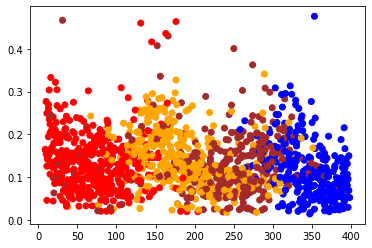

In [44]:
# Save results and predictions
gmm_clust_stds = []
gmm_peaks = []
gmm_clust_minmax = []
is_multiple = []
y_mod = []
peaks_clust_top1 = []
peaks_clust_top2 = []
star_ids = []
_silhouette_avg = []
aux_v = []
for star in df_bedding.take(57):  # take the stars
    target = np.where(star[2].numpy().flat == 1)[0].flat[0] / 0.0864
    # Save results
    if star[0].numpy()[0].decode("utf-8") not in results:
        results[star[0].numpy()[0].decode("utf-8")] = {
            "dnu-target": target,
        }

    # Get vector corresponding to DFT
    aux_dft = star[1][0, :, 1].numpy()
    aux_ac = star[1][0, :, 0].numpy()
    # aux = np.divide(aux_ac, aux_dft, out=np.zeros_like(aux_ac), where=aux_dft!=0)
    # aux_v.append(aux)
    aux = aux_ac

    # Get all peaks
    peaks, peaks_pos = find_peaks(aux, height=0.0, distance=5)
    peaks_width = peak_widths(aux, peaks)
    peaks_sorted_by_prob = np.sort(aux[peaks])[::-1]

    # Adjust mixture of gaussians on peaks and hegight
    peaks_clust = np.vstack((peaks, peaks_pos["peak_heights"])).T
    # Fit model
    gmmModel = GaussianMixture(
        n_components=4, covariance_type="full", random_state=123
    ).fit(peaks_clust)
    # Plot
    colors = ["red", "green", "blue", "purple", "orange", "brown"]
    plt.scatter(
        peaks,
        peaks_pos["peak_heights"],
        c=gmmModel.predict(peaks_clust),
        cmap=matplotlib.colors.ListedColormap(colors),
    )

    si_coef = []
    n_components = np.arange(2, 10)
    for n_c in n_components:

        model = GaussianMixture(n_c, covariance_type="full", random_state=0).fit(
            peaks_clust
        )
        cluster_labels = model.predict(peaks_clust)
        silhouette_avg = silhouette_score(peaks_clust, cluster_labels)
        si_coef.append(silhouette_avg)
        # print("For n_clusters =", n_c, "The average silhouette_score is :", silhouette_avg)
    # plt.plot(si_coef)
    # plt.show()

    # Get star info to create a y_label
    _star_id = star[0].numpy()[0].decode("utf-8")
    _top1 = df[df["id"] == _star_id]["top1"].values[0]
    _target = df[df["id"] == _star_id]["dnu-target"].values[0]

    # Check if top-1 and top-2 is a multiple
    t1 = df[df["id"] == _star_id]["top1"].values[0]
    t2 = df[df["id"] == _star_id]["top2"].values[0]
    print("%f - %f" % (t1, t2))
    mult = -1
    if t1 > t2:
        mult = t1 % t2
    else:
        mult = t2 % t1
    is_multiple.append(mult < 5)

    if np.abs(_target - t1) < np.abs(_target - t2):
        y_mod.append(True)
    else:
        y_mod.append(False)

    print("star id: %s" % star[0])
    print(
        "Target",
        _target,
        "t1",
        t1,
        "t2",
        t2,
        "flag",
        np.abs(_target - t1) < np.abs(_target - t2),
    )

    # Add std of covariances
    gmm_clust_stds.append(np.std(gmmModel.covariances_))
    gmm_peaks.append(peaks.shape[0])
    gb = pd.DataFrame({"peaks": peaks, "clust": gmmModel.predict(peaks_clust)}).groupby(
        ["clust"]
    )
    gmm_clust_minmax.append(
        np.mean(np.abs(gb.agg([np.min]).values - gb.agg([np.max]).values)[0])
    )

    gb_agg = gb.agg(np.sum)
    t1_clust = gmmModel.predict(np.asarray([t1, 1]).reshape(-1, 2))
    t2_clust = gmmModel.predict(np.asarray([t2, 1]).reshape(-1, 2))
    peaks_clust_top1.append(gb_agg.iloc[t1_clust].values[0][0])
    peaks_clust_top2.append(gb_agg.iloc[t2_clust].values[0][0])
    top1_gr_top2.append(t1 > t2)

    star_ids.append(_star_id)
    _silhouette_avg.append(np.argmax(np.diff(si_coef)))

    print("=================================================")

In [45]:
gmm_clust = np.vstack(
    (
        gmm_clust_stds,
        gmm_peaks,
        gmm_clust_minmax,
        is_multiple,
        peaks_clust_top1,
        peaks_clust_top2,
    )
)
gmm_clust = gmm_clust.reshape(57, 6)

gmm_clust_data = pd.DataFrame(
    {
        "clust_cov_stds": gmm_clust_stds,
        "peaks_number": gmm_peaks,
        "std_min_max_clust": gmm_clust_minmax,
        "has_mult": is_multiple,
        "peaks_clust_top1": peaks_clust_top1,
        "peaks_clust_top2": peaks_clust_top2,
        "y_mod": y_mod,
        "star_ids": star_ids,
        "sil": _silhouette_avg,
    }
)

gmm_clust_data

clust_cov_stds  peaks_number  std_min_max_clust  has_mult  \
0       429.789966            24              127.0     False   
1       367.270122            22              117.0      True   
2       439.653770            21              122.0     False   
3       392.895557            24               73.0     False   
4       728.308732            24               58.0     False   
5       340.556954            25               99.0      True   
6       544.757148            23              127.0     False   
7       470.096115            24               67.0     False   
8       401.331802            25              118.0     False   
9       467.463306            26              150.0     False   
10      355.519911            21               66.0     False   
11      559.561339            25              119.0     False   
12      306.431346            25               89.0      True   
13      622.533522            28              162.0     False   
14      393.115361            21              116.0     False   
15      297.906724            16               44.0      True   
16      268.840387            27               83.0      True   
17      305.786037            28               73.0     False   
18      478.399559            28               90.0     False   
19      563.336048            26               81.0      True   
20      483.119804            25               93.0     False   
21      252.968704            23               71.0     False   
22      371.755527            23               77.0     False   
23      284.455001            23               55.0     False   
24      323.573965            23               99.0      True   
25      427.702552            30              108.0      True   
26      479.414772            29              122.0      True   
27      513.240952            27               95.0     False   
28      446.470520            29               94.0     False   
29      458.942454            20               91.0     False   
30      437.505047            25              117.0     False   
31      652.697441            22              125.0     False   
32     1575.903849            26               96.0     False   
33      351.092080            25               82.0     False   
34      362.791324            24               93.0     False   
35      555.295788            27              144.0     False   
36      334.142017            17               59.0      True   
37      412.768059            26               99.0     False   
38      480.364354            30               69.0      True   
39      565.344263            27               98.0     False   
40      348.562464            30              101.0     False   
41      435.155125            27               89.0     False   
42      604.892580            25              114.0      True   
43      566.663046            26               58.0      True   
44      306.810770            24               83.0     False   
45      411.571977            21               95.0     False   
46      366.870355            23              105.0     False   
47      350.906571            18               74.0     False   
48      347.749300            25               74.0     False   
49      348.982222            26               99.0     False   
50      374.953054            24               98.0      True   
51      655.966635            25              176.0     False   
52      363.180382            25               83.0      True   
53      391.151607            24               53.0     False   
54      328.613662            25               87.0      True   
55      761.803510            24              133.0      True   
56      411.083781            29              103.0      True   

    peaks_clust_top1  peaks_clust_top2  y_mod  \
0                656               656   True   
1                538               538  False   
2                501               501  False   
3               1185              118

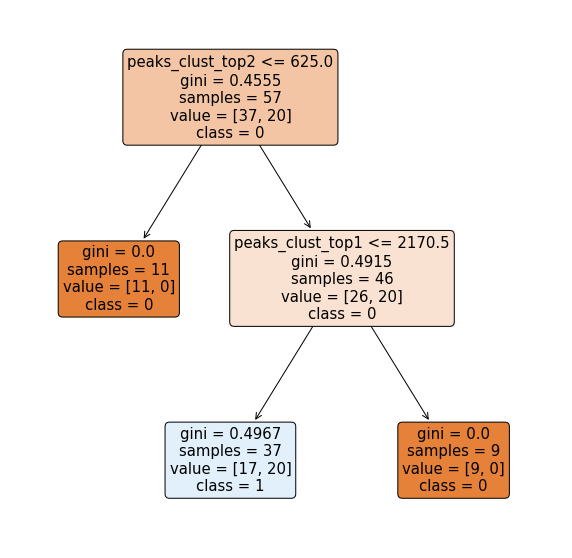

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


clf_b = DecisionTreeClassifier(random_state=0, max_depth=2)
clf_b.fit(gmm_clust_data[selected_vars_gmm], gmm_clust_data[["y_mod"]])
plt.figure(figsize=(10, 10))
dec_tree = plot_tree(
    decision_tree=clf_b,
    feature_names=selected_vars_gmm,
    class_names=["0", "1"],
    filled=True,
    precision=4,
    rounded=True,
)

In [47]:
confusion_matrix(y_mod, clf.predict(gmm_clust_data[selected_vars_gmm]))

array([[ 6, 31],
       [ 2, 18]])

In [48]:
print(classification_report(y_mod, clf.predict(gmm_clust_data[selected_vars_gmm])))

              precision    recall  f1-score   support

       False       0.75      0.16      0.27        37
        True       0.37      0.90      0.52        20

    accuracy                           0.42        57
   macro avg       0.56      0.53      0.39        57
weighted avg       0.62      0.42      0.36        57



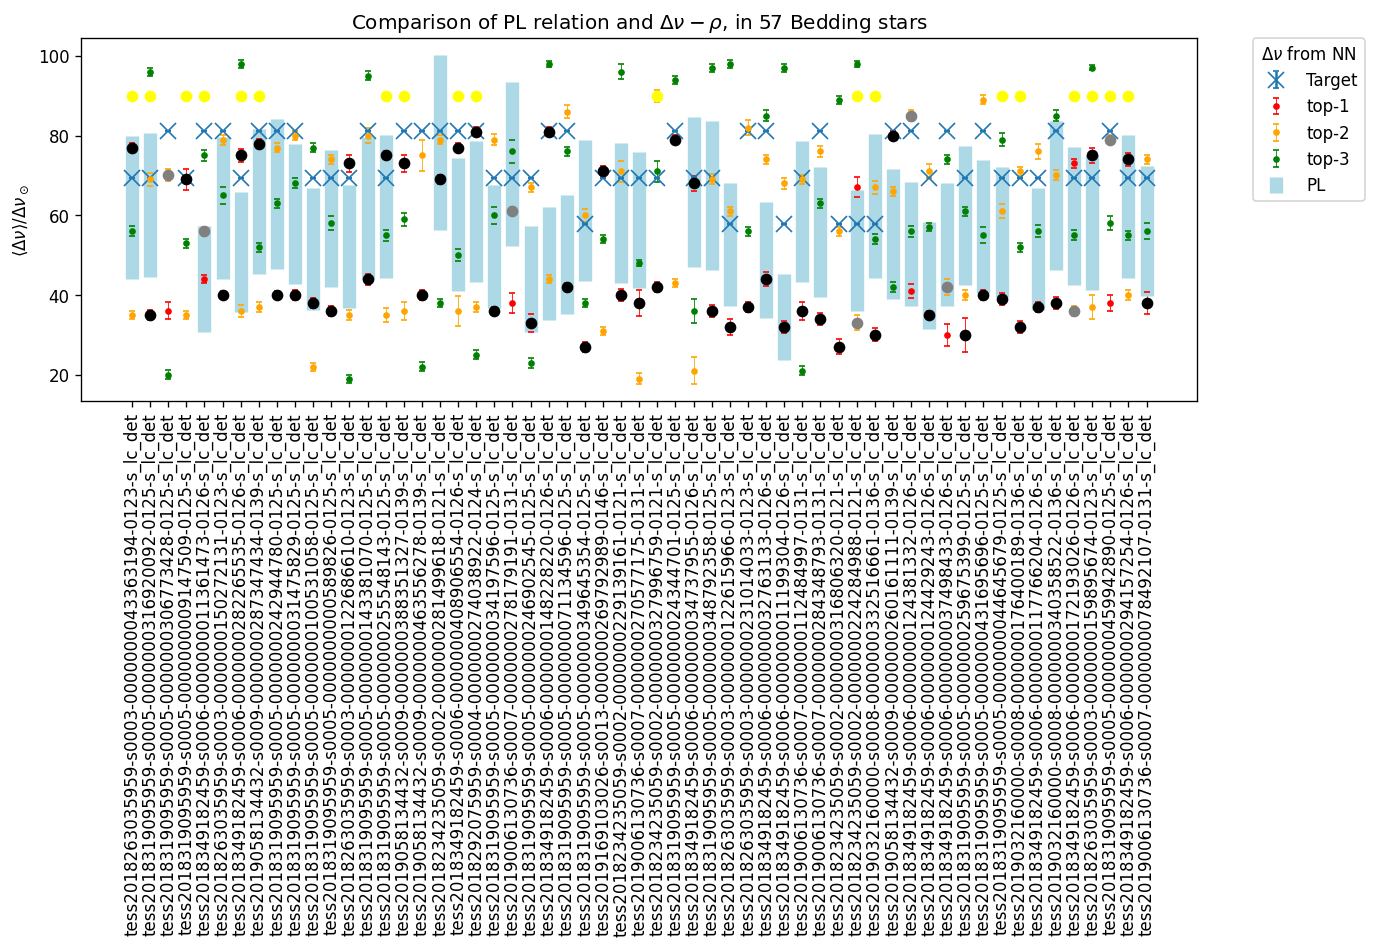

57


In [49]:
plt.subplots(1, figsize=(12, 4), dpi=120)

# Prepare data plot
targets = []
inferences = []
inferences_top2 = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    inferences_top2.append(results[tess_id]["top2"])


for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], 90, color="yellow", zorder=1000)
    # get prediction
    flag = clf.predict(
        gmm_clust_data[gmm_clust_data["star_ids"] == ids[i]][selected_vars_gmm].values
    )
    if flag:
        plt.scatter(ids[i], inferences[i], color="black", zorder=1000)
    else:
        plt.scatter(ids[i], inferences_top2[i], color="grey", zorder=1000)


plt.errorbar(
    df["id"], df["dnu-target"], 0, fmt="x", markersize=10, capsize=2, label="Target"
)
plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)


plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 57 Bedding stars")
# plt.ylim(0, 1.0)
plt.show()
print(len(df.index))

In [50]:
df_att["Dnu"] = np.nan
df_att["Dnu-top1"] = np.nan
df_att["Dnu-top2"] = np.nan
df_att["Dnu-top3"] = np.nan
df_att["Dnu-top1-e"] = np.nan
df_att["Dnu-top2-e"] = np.nan
df_att["Dnu-top3-e"] = np.nan
df_att["rho-top1"] = np.nan
df_att["rho-top2"] = np.nan
df_att["rho-top3"] = np.nan
df_att["rho-top1-e"] = np.nan
df_att["rho-top2-e"] = np.nan
df_att["rho-top3-e"] = np.nan


for result in results:
    i = str(int(result.split("-")[2]))
    print(results[result])
    # Dnus
    df_att.loc[df_att.TIC == i, ["Dnu-top1"]] = results[result]["top1"]
    df_att.loc[df_att.TIC == i, ["Dnu-top2"]] = results[result]["top2"]
    df_att.loc[df_att.TIC == i, ["Dnu-top3"]] = results[result]["top3"]
    df_att.loc[df_att.TIC == i, ["Dnu-top1-e"]] = results[result]["e-top1"]
    df_att.loc[df_att.TIC == i, ["Dnu-top2-e"]] = results[result]["e-top2"]
    df_att.loc[df_att.TIC == i, ["Dnu-top3-e"]] = results[result]["e-top3"]
    # Rhos
    df_att.loc[df_att.TIC == i, ["rho-top1"]] = get_rho(
        np.asarray(results[result]["top1"]) / dnu_sun
    )
    df_att.loc[df_att.TIC == i, ["rho-top2"]] = get_rho(
        np.asarray(results[result]["top2"]) / dnu_sun
    )
    df_att.loc[df_att.TIC == i, ["rho-top3"]] = get_rho(
        np.asarray(results[result]["top3"]) / dnu_sun
    )

    df_att.loc[df_att.TIC == i, ["rho-top1-e"]] = rho_error(
        np.float64(np.asarray(results[result]["top1"]) / dnu_sun)
    )
    df_att.loc[df_att.TIC == i, ["rho-top2-e"]] = rho_error(
        np.float64(np.asarray(results[result]["top2"]) / dnu_sun)
    )
    df_att.loc[df_att.TIC == i, ["rho-top3-e"]] = rho_error(
        np.float64(np.asarray(results[result]["top3"]) / dnu_sun)
    )

 'e-top4': 1.3745426886036185, 'dnu-from-P-up-fromstarmodel': nan, 'dnu-from-P-down-fromstarmodel': nan, 'dnu-from-P-up': nan, 'dnu-from-P-down': nan}
{'dnu-target': 69.44444444444444, 'top1': 69, 'e-top1': 2.681214022942598, 'top2': 35, 'e-top2': 1.0720960307720304, 'top3': 53, 'e-top3': 1.1323468492265292, 'top4': 22, 'e-top4': 1.9955973008889707, 'dnu-from-P-up-fromstarmodel': nan, 'dnu-from-P-down-fromstarmodel': nan, 'dnu-from-P-up': nan, 'dnu-from-P-down': nan}
{'dnu-target': 81.01851851851852, 'top1': 44, 'e-top1': 1.014310288007394, 'top2': 56, 'e-top2': 1.1783503898794692, 'top3': 75, 'e-top3': 1.3735515480046558, 'top4': 90, 'e-top4': 1.7834720079858357, 'dnu-from-P-up-fromstarmodel': 54.15893277378683, 'dnu-from-P-down-fromstarmodel': 28.896970115638823, 'dnu-from-P-up': 57.24314380848777, 'dnu-from-P-down': 30.70117812340614}
{'dnu-target': 81.01851851851852, 'top1': 40, 'e-top1': 1.0219322687501489, 'top2': 79, 'e-top2': 1.2542398675528688, 'top3': 65, 'e-top3': 2.10716914

In [51]:
df_att.keys()

Index(['HD', 'Name', 'TIC', 'V', 'Teff', 'L', 'e.L.', 'rho', 'e.rho.', 'Dnu',
       'eps', 'vsini', 'e.vsini.', 'F0', 'logg', 'Teff_mast', 'e_logg',
       'e_Teff_mast', 'stellar_radius', 'e_stellar_radius', 'dnu_muhz',
       'Dnu-top1', 'Dnu-top2', 'Dnu-top3', 'Dnu-top1-e', 'Dnu-top2-e',
       'Dnu-top3-e', 'rho-top1', 'rho-top2', 'rho-top3', 'rho-top1-e',
       'rho-top2-e', 'rho-top3-e'],
      dtype='object')

In [52]:
# Save csv
df_att[
    [
        "HD",
        "TIC",
        "logg",
        "e_logg",
        "Teff_mast",
        "e_Teff_mast",
        "vsini",
        "e.vsini.",
        "Dnu-top1",
        "Dnu-top2",
        "Dnu-top3",
        "Dnu-top1-e",
        "Dnu-top2-e",
        "Dnu-top3-e",
        "rho-top1",
        "rho-top2",
        "rho-top3",
        "rho-top1-e",
        "rho-top2-e",
        "rho-top3-e",
    ]
].to_csv("../bedding_nn.csv", index=False, header=True)

In [53]:
df_att

HD             Name         TIC      V    Teff      L  e.L.   rho  \
0     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
1     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
2    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
3    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
4    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
5    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
6    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
7    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
8    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
9    24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
10   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
11   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
12   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
13   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
14   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
15   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
16   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
17   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
18   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
19   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
20   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
21   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
22   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
23   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
24   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
25   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
26   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
27   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
28   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
29   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
30   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
31   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
32   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
33   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
34   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
35   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
36   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
37   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
38   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
39   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
40   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
41   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
42   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
43   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
44   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
45   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
46  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
47  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
48  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
49  290750.0              NaN    11199304   9.77  9170.0  19

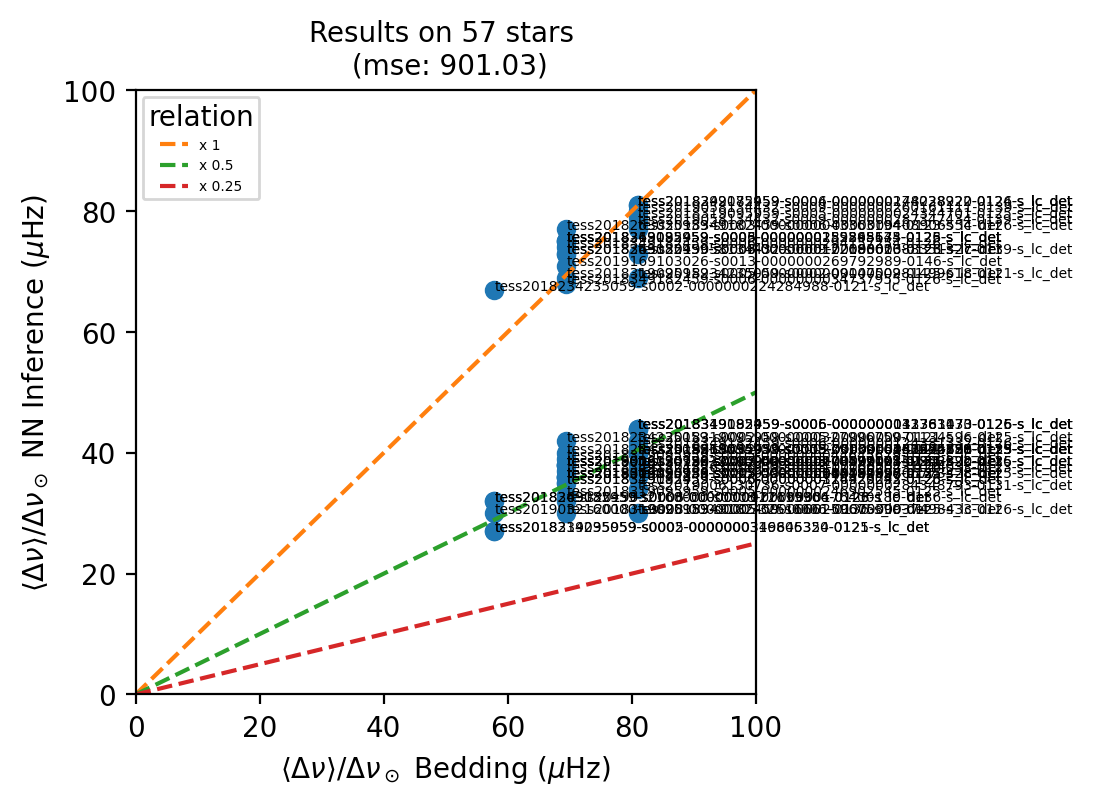

In [54]:
# Prepare data plot
targets = []
inferences = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o")  # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ Bedding ($\mu$Hz)")
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ NN Inference ($\mu$Hz)")
plt.title(
    "Results on 57 stars \n (mse: %s)"
    % np.round(np.mean(np.power(np.asarray(targets) - np.asarray(inferences), 2)), 2),
    fontsize=10,
)
plt.show()

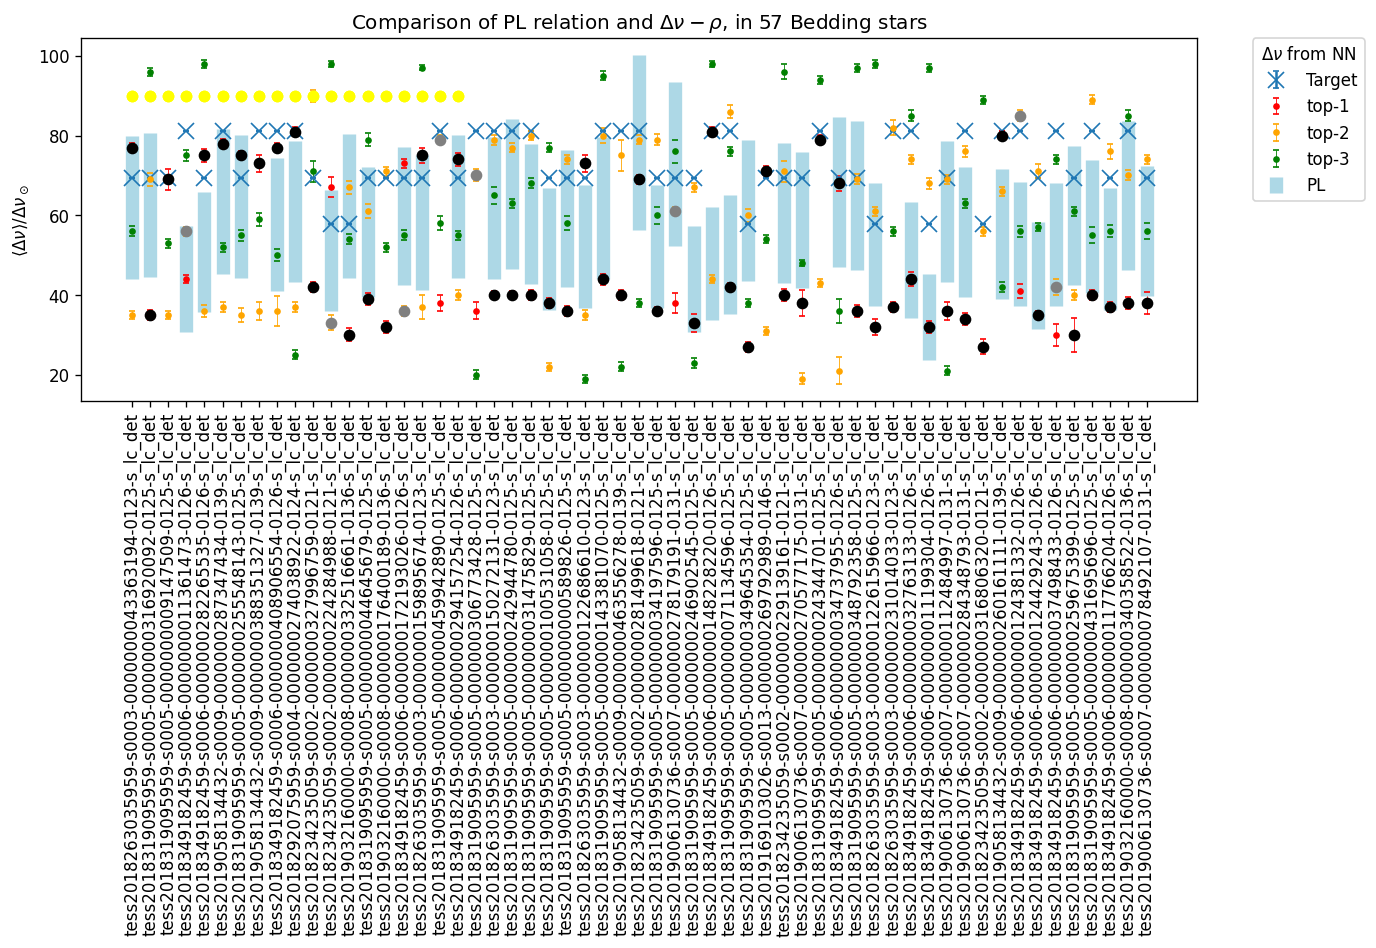

57


In [55]:
plt.subplots(1, figsize=(12, 4), dpi=120)

# Prepare data plot
targets = []
inferences = []
inferences_top2 = []
ids = []
for tess_id in results:
    ids.append(tess_id)
    targets.append(results[tess_id]["dnu-target"])
    inferences.append(results[tess_id]["top1"])
    inferences_top2.append(results[tess_id]["top2"])

for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], 90, color="yellow", zorder=1000)


for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], 90, color="yellow", zorder=1000)
    # get prediction
    flag = clf.predict(
        gmm_clust_data[gmm_clust_data["star_ids"] == ids[i]][selected_vars_gmm].values
    )
    if flag:
        plt.scatter(ids[i], inferences[i], color="black", zorder=1000)
    else:
        plt.scatter(ids[i], inferences_top2[i], color="grey", zorder=1000)


plt.errorbar(
    df["id"], df["dnu-target"], 0, fmt="x", markersize=10, capsize=2, label="Target"
)
plt.errorbar(
    df["id"],
    df["top1"],
    df["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)
plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)


plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 57 Bedding stars")
# plt.ylim(0, 1.0)
plt.show()
print(len(df.index))

In [56]:
# Are radial modes fit with NN ?

sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
np.count_nonzero(sign)

vals = np.asarray(targets, dtype=float)[sign == True]

df[sign == True]

"""

HD 20232 : tess2018263035959-s0003-0000000159895674-0123 : SI [no hay Luminosidad disponible]
HD 24975 : tess2018319095959-s0005-0000000044645679-0125 : NO
HD 25248 : tess2018319095959-s0005-0000000459942890-0125 : NO [no hay Luminosidad disponible]
HD 25369 : tess2018319095959-s0005-0000000009147509-0125 : SI [no hay Luminosidad disponible]
HD 31901 : tess2018319095959-s0005-0000000316920092-0125 : NO (SI con L)
HD 20203 : tess2018292075959-s0004-0000000274038922-0124 : SI
HD 40317 : tess2018349182459-s0006-0000000282265535-0126 : SI
HD 42005 : tess2018349182459-s0006-0000000408906554-0126 : SI
HD 44958 : tess2018319095959-s0005-0000000255548143-0125 : SI
HD 46722 : tess2018349182459-s0006-0000000172193026-0126 : SI
HD 55863 : tess2018349182459-s0006-0000000294157254-0126 : SI
HD 99506 : tess2019058134432-s0009-0000000287347434-0139 : SI
HD 290799: tess2018349182459-s0006-0000000011361473-0126 : NO [Valor de Bedding fuera de ventana L]
-----------------------------------------------------------------------------------------------
> HD 187547 : KIC7548479 ???
HD 70510 : tess2019058134432-s0009-0000000388351327-0139 : SI
HD 75040 : tess2019032160000-s0008-0000000176400189-0136 : NO [no hay Luminosidad disponible]
HD 3622  : tess2018263035959-s0003-0000000043363194-0123 : SI
HD 220811: tess2018234235059-s0002-0000000327996759-0121 : NO [no hay Luminosidad disponible]
HD 223011: tess2018234235059-s0002-0000000224284988-0121 : SI
HD 78198: tess2019032160000-s0008-0000000332516661-0136 :  NO (SI con L)

Totales:
12(si)/19(total) = 63%
14(si)/19(total) = 73%

Solo las identificadas:
9(si) /13(total)  = 69%
10(si)/13(total) = 76%


>(no) HD 32433 : tess2018319095959-s0005-0000000348792358-0125 : NO (SI con L)
"""

'\n\nHD 20232 : tess2018263035959-s0003-0000000159895674-0123 : SI [no hay Luminosidad disponible]\nHD 24975 : tess2018319095959-s0005-0000000044645679-0125 : NO\nHD 25248 : tess2018319095959-s0005-0000000459942890-0125 : NO [no hay Luminosidad disponible]\nHD 25369 : tess2018319095959-s0005-0000000009147509-0125 : SI [no hay Luminosidad disponible]\nHD 31901 : tess2018319095959-s0005-0000000316920092-0125 : NO (SI con L)\nHD 20203 : tess2018292075959-s0004-0000000274038922-0124 : SI\nHD 40317 : tess2018349182459-s0006-0000000282265535-0126 : SI\nHD 42005 : tess2018349182459-s0006-0000000408906554-0126 : SI\nHD 44958 : tess2018319095959-s0005-0000000255548143-0125 : SI\nHD 46722 : tess2018349182459-s0006-0000000172193026-0126 : SI\nHD 55863 : tess2018349182459-s0006-0000000294157254-0126 : SI\nHD 99506 : tess2019058134432-s0009-0000000287347434-0139 : SI\nHD 290799: tess2018349182459-s0006-0000000011361473-0126 : NO [Valor de Bedding fuera de ventana L]\n-------------------------------

In [57]:
df.head(5)

id  dnu-target top1  \
0  tess2018263035959-s0003-0000000043363194-0123-...   69.444444   77   
1  tess2018319095959-s0005-0000000316920092-0125-...   69.444444   35   
2  tess2018319095959-s0005-0000000306773428-0125-...   81.018519   36   
3  tess2018319095959-s0005-0000000009147509-0125-...   69.444444   69   
4  tess2018349182459-s0006-0000000011361473-0126-...   81.018519   44   

     e-top1 top2    e-top2 top3    e-top3 top4    e-top4  \
0  1.180074   35  1.051584   56  1.271015   95  1.188352   
1  1.220290   69  1.579554   96  1.060360   54  2.088074   
2  2.120982   70  1.526464   20  1.186996   55  1.374543   
3  2.681214   35  1.072096   53  1.132347   22  1.995597   
4  1.014310   56  1.178350   75  1.373552   90  1.783472   

   dnu-from-P-up-fromstarmodel  dnu-from-P-down-fromstarmodel  dnu-from-P-up  \
0                    73.233508                      40.133400      79.806657   
1                    72.861387                      39.912695      80.599917   
2                          NaN                            NaN            NaN   
3                          NaN                            NaN            NaN   
4                    54.158933                      28.896970      57.243144   

   dnu-from-P-down  
0        44.039208  
1        44.511417  
2              NaN  
3              NaN  
4        30.701178

In [58]:
# Get Dnu corrected by gravity darkening
df_att_gravity_dark = pd.io.parsers.read_csv("../data/bedding/rangos.csv", sep=",")
df_att_gravity_dark = pd.concat([df_att, df_att_gravity_dark], axis=1)
df_att_gravity_dark.head(5)

HD Name        TIC     V    Teff      L  e.L.   rho  e.rho.  Dnu  ...  \
0   2280.0  NaN  281499618  9.13  7510.0   5.52  0.26  0.49    0.06  NaN  ...   
1   3622.0  NaN   43363194  7.77  7930.0   7.86  0.35  0.45    0.06  NaN  ...   
2  10779.0  NaN  229139161  8.78  7730.0   8.13  0.36  0.39    0.05  NaN  ...   
3  10961.0  NaN  231014033  9.39  7430.0    NaN   NaN   NaN     NaN  NaN  ...   
4  17341.0  NaN  122615966  9.32  7810.0  10.05  0.50  0.32    0.05  NaN  ...   

   rho-top3  rho-top1-e  rho-top2-e  rho-top3-e      LS_MC  LS_MC_error  \
0  0.123968    0.129821    0.170372    0.039335  84.677139     6.458551   
1  0.271323    0.161815    0.033382    0.085418  76.542537     5.872866   
2  0.805999    0.043577    0.137485    0.252155  72.106573     5.373975   
3  0.271323    0.037296    0.183626    0.085418  75.992309     5.812780   
4  0.840278    0.027919    0.101387    0.262845  65.638744     4.790613   

      LLimit      ULimit      LS_NC  LS_NC_error  
0  64.088283  111.229460  87.945178     7.689993  
1  57.903089  100.586500  79.077425     7.096835  
2  54.677255   94.563604  75.497858     6.531593  
3  57.501492   99.841628  75.921242     6.998183  
4  49.855826   85.957754  66.735242     5.879552  

[5 rows x 39 columns]

In [59]:
results_bedding = pd.DataFrame(
    columns=[
        "id",
        "dnu-target",
        "e-dnu-target",
        "dnu-from-P",
        "e-dnu-from-P",
        "best-top",
        "e-best-top",
        "ktop",
        "top1",
        "e-top1",
        "top2",
        "e-top2",
        "LS_MC",
        "LS_MC_llmit",
        "LS_MC_ulimit"
    ]
)

for index, row in df.iterrows():
    print("Proccessing star %s" % row["id"])
    print("PL[%f,%f]" % (row["dnu-from-P-up"], row["dnu-from-P-down"]))
    # Top index to search on
    top_indexs = ["top1", "top2"]
    best = np.nan  # empty on start
    # Center of PL window
    central_pl_window = row["dnu-from-P-up"] - (
        (row["dnu-from-P-up"] - row["dnu-from-P-down"]) / 2
    )
    # Check predictions indise L window
    inside_pl_window = []
    for top_index in top_indexs:
        flag_full_inside = (
            row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"]
        ) & (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
        flag_partial = (
            (row[top_index] - row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
            & (row[top_index] - row["e-%s" % (top_index)] <= row["dnu-from-P-up"])
        ) | (
            (row[top_index] + row["e-%s" % (top_index)] >= row["dnu-from-P-down"])
            & (row[top_index] + row["e-%s" % (top_index)] <= row["dnu-from-P-up"])
        )
        if flag_full_inside or flag_partial:
            inside_pl_window.append(top_index)
    print("   =>Inside PL window: %s" % inside_pl_window)

    # Gravity darkening info
    gd_info = df_att_gravity_dark[df_att_gravity_dark.TIC==str(int(row["id"].split("-")[2]))]["LS_MC"].values[0]
    gd_llimit_info = df_att_gravity_dark[df_att_gravity_dark.TIC==str(int(row["id"].split("-")[2]))]["LLimit"].values[0]
    gd_ulimit_info = df_att_gravity_dark[df_att_gravity_dark.TIC==str(int(row["id"].split("-")[2]))]["ULimit"].values[0]

    if (len(inside_pl_window) > 0) and (not np.isnan(row["dnu-from-P-up"])):
        print("=>", inside_pl_window)
        top_index = inside_pl_window[0]  # Get most probable from NN

        # Get best
        best = row["%s" % (top_index)]
        results_bedding.loc[len(results_bedding)] = [
            row["id"],
            row["dnu-target"],
            0.23,
            (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
            row["dnu-from-P-up"]
            - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
            best,
            row["e-%s" % top_index],
            top_index,
            row["top1"],
            row["e-top1"],
            row["top2"],
            row["e-top2"],
            gd_info,
            gd_llimit_info,
            gd_ulimit_info
        ]
    else:
        # Get closest inference to the center of PL window
        top_index = np.argmin(
            [np.abs(row[top_index] - central_pl_window) for top_index in top_indexs]
        )
        # Check if predictions is not inside window
        # Get best
        best = row["top%s" % (top_index + 1)]
        results_bedding.loc[len(results_bedding)] = [
            row["id"],
            row["dnu-target"],
            0.23,
            (row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2,
            row["dnu-from-P-up"]
            - ((row["dnu-from-P-up"] + row["dnu-from-P-down"]) / 2),
            best,
            row["e-top%s" % (top_index + 1)],
            top_index,
            row["top1"],
            row["e-top1"],
            row["top2"],
            row["e-top2"],
            gd_info,
            gd_llimit_info,
            gd_ulimit_info
        ]

Proccessing star tess2018263035959-s0003-0000000043363194-0123-s_lc_det
PL[79.806657,44.039208]
   =>Inside PL window: ['top1']
=> ['top1']
Proccessing star tess2018319095959-s0005-0000000316920092-0125-s_lc_det
PL[80.599917,44.511417]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star tess2018319095959-s0005-0000000306773428-0125-s_lc_det
PL[nan,nan]
   =>Inside PL window: []
Proccessing star tess2018319095959-s0005-0000000009147509-0125-s_lc_det
PL[nan,nan]
   =>Inside PL window: []
Proccessing star tess2018349182459-s0006-0000000011361473-0126-s_lc_det
PL[57.243144,30.701178]
   =>Inside PL window: ['top1', 'top2']
=> ['top1', 'top2']
Proccessing star tess2018263035959-s0003-0000000150272131-0123-s_lc_det
PL[79.741459,44.000405]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star tess2018349182459-s0006-0000000282265535-0126-s_lc_det
PL[65.960827,35.829308]
   =>Inside PL window: ['top2']
=> ['top2']
Proccessing star tess2019058134432-s0009-0000000287347434-0139-s

### Append gravity darkening data (from Sebastià)

In [60]:
results_bedding

id  dnu-target  \
0   tess2018263035959-s0003-0000000043363194-0123-...   69.444444   
1   tess2018319095959-s0005-0000000316920092-0125-...   69.444444   
2   tess2018319095959-s0005-0000000306773428-0125-...   81.018519   
3   tess2018319095959-s0005-0000000009147509-0125-...   69.444444   
4   tess2018349182459-s0006-0000000011361473-0126-...   81.018519   
5   tess2018263035959-s0003-0000000150272131-0123-...   81.018519   
6   tess2018349182459-s0006-0000000282265535-0126-...   69.444444   
7   tess2019058134432-s0009-0000000287347434-0139-...   81.018519   
8   tess2018319095959-s0005-0000000242944780-0125-...   81.018519   
9   tess2018319095959-s0005-0000000031475829-0125-...   81.018519   
10  tess2018319095959-s0005-0000000100531058-0125-...   69.444444   
11  tess2018319095959-s0005-0000000000589826-0125-...   69.444444   
12  tess2018263035959-s0003-0000000122686610-0123-...   69.444444   
13  tess2018319095959-s0005-0000000143381070-0125-...   81.018519   
14  tess2018319095959-s0005-0000000255548143-0125-...   69.444444   
15  tess2019058134432-s0009-0000000388351327-0139-...   81.018519   
16  tess2019058134432-s0009-0000000463556278-0139-...   81.018519   
17  tess2018234235059-s0002-0000000281499618-0121-...   81.018519   
18  tess2018349182459-s0006-0000000408906554-0126-...   81.018519   
19  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   
20  tess2018319095959-s0005-0000000034197596-0125-...   69.444444   
21  tess2019006130736-s0007-0000000278179191-0131-...   69.444444   
22  tess2018319095959-s0005-0000000246902545-0125-...   69.444444   
23  tess2018349182459-s0006-0000000148228220-0126-...   81.018519   
24  tess2018319095959-s0005-0000000071134596-0125-...   81.018519   
25  tess2018319095959-s0005-0000000349645354-0125-...   57.870370   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   
27  tess2018234235059-s0002-0000000229139161-0121-...   69.444444   
28  tess2019006130736-s0007-0000000270577175-0131-...   69.444444   
29  tess2018234235059-s0002-0000000327996759-0121-...   69.444444   
30  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   
31  tess2018349182459-s0006-0000000034737955-0126-...   69.444444   
32  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   
33  tess2018263035959-s0003-0000000122615966-0123-...   57.870370   
34  tess2018263035959-s0003-0000000231014033-0123-...   81.018519   
35  tess2018349182459-s0006-0000000032763133-0126-...   81.018519   
36  tess2018349182459-s0006-0000000011199304-0126-...   57.870370   
37  tess2019006130736-s0007-0000000112484997-0131-...   69.444444   
38  tess2019006130736-s0007-0000000284348793-0131-...   81.018519   
39  tess2018234235059-s0002-0000000316806320-0121-...   57.870370   
40  tess2018234235059-s0002-0000000224284988-0121-...   57.870370   
41  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   
42  tess2019058134432-s0009-0000000260161111-0139-...   81.018519   
43  tess2018349182459-s0006-0000000124381332-0126-...   81.018519   
44  tess2018349182459-s0006-0000000124429243-0126-...   69.444444   
45  tess2018349182459-s0006-0000000037498433-0126-...   81.018519   
46  tess2018319095959-s0005-0000000259675399-0125-...   69.444444   
47  tess2018319095959-s0005-0000000431695696-0125-...   81.018519   
48  tess2018319095959-s0005-0000000044645679-0125-...   69.444444   
49  tess2019032160000-s0008-0000000176400189-0136-...   69.444444   
50  tess2018349182459-s0006-0000000117766204-0126-...   69.444444   
51  tess2019032160000-s0008-0000000340358522-0136-...   81.018519   
52  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   
53  tess2018263035959-s0003-0000000159895674-0123-...   69.444444   
54  tess2018319095959-s0005-0000000459942890-0125-...   81.018519   
55  tess2018349182459-s0006-0000000294157254-0126-...   69.444444   
56  tess2019006130736-s0007-0000000078492107-0131-...   69.444444   

    e-dnu-target  dnu-from-P  e-dnu-from-P best-

In [61]:
# Get index (top-1 or top-2) of the closest top-n value to the corrected Dnu
selection = np.power(
    results_bedding["top1"] - results_bedding["LS_MC"], 2
) < np.power(results_bedding["top2"] - results_bedding["LS_MC"], 2)


# Select lower error with corrected Dnu (corrected by gravity darkening)
_corrected_error = results_bedding[["id", "dnu-target", "top1", "LS_MC_llmit", "LS_MC_ulimit"]].where(
    selection == True, results_bedding[["id", "dnu-target", "top2", "LS_MC_llmit", "LS_MC_ulimit"]].values
)

# Add flag to indicate stars with no corrected LS_MC
results_bedding["is_na_LS_MC"] = results_bedding[["LS_MC"]] != 0.0
results_bedding["best-top-gd"] = _corrected_error[["top1"]]

# Show sample
results_bedding.head(3)

id  dnu-target  \
0  tess2018263035959-s0003-0000000043363194-0123-...   69.444444   
1  tess2018319095959-s0005-0000000316920092-0125-...   69.444444   
2  tess2018319095959-s0005-0000000306773428-0125-...   81.018519   

   e-dnu-target  dnu-from-P  e-dnu-from-P best-top  e-best-top  ktop top1  \
0          0.23   61.922932     17.883725       77    1.180074  top1   77   
1          0.23   62.555667     18.044250       69    1.579554  top2   35   
2          0.23         NaN           NaN       36    2.120982     0   36   

     e-top1 top2    e-top2      LS_MC  LS_MC_llmit  LS_MC_ulimit  is_na_LS_MC  \
0  1.180074   35  1.051584  76.542537    57.903089    100.586500         True   
1  1.220290   69  1.579554  71.795065    54.524115     94.031337         True   
2  2.120982   70  1.526464   0.000000     0.000000      0.000000        False   

  best-top-gd  
0          77  
1          69  
2          36

In [62]:
gd_not_na = results_bedding["LS_MC"]>=0.0

accuracy = (
    np.abs(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["top1"]) < 30
)
print(
    "Top-1:                                   %f%% (%d correct, %d not correct)"
    % (
        accuracy.value_counts().loc[True] / len(_corrected_error.index),
        accuracy.value_counts().loc[True],
        accuracy.value_counts().loc[False],
    )
)


accuracy = (
    np.abs(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["best-top"]) < 30
)
print(
    "Top-n (corrected by Lum):                %f%% (%d correct, %d not correct)"
    % (
        accuracy.value_counts().loc[True] / len(_corrected_error.index),
        accuracy.value_counts().loc[True],
        accuracy.value_counts().loc[False],
    )
)

accuracy = (
    np.abs(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["best-top-gd"]) < 30
)

print(
    "Top corrected by GD:                     %f%% (%d correct, %d not correct)"
    % (
        accuracy.value_counts().loc[True] / len(_corrected_error.index),
        accuracy.value_counts().loc[True],
        accuracy.value_counts().loc[False],
    )
)

accuracy = (results_bedding["dnu-target"] >= results_bedding["LS_MC_llmit"]) & (
    results_bedding["dnu-target"] <= _corrected_error["LS_MC_ulimit"]
)

print(
    "Bedding DNU in GD ranges:                %f%% (%d correct, %d not correct)"
    % (
        accuracy.value_counts().loc[True] / len(_corrected_error.index),
        accuracy.value_counts().loc[True],
        accuracy.value_counts().loc[False],
    )
)

Top-1:                                   0.421053% (24 correct, 33 not correct)
Top-n (corrected by Lum):                0.578947% (33 correct, 24 not correct)
Top corrected by GD:                     0.719298% (41 correct, 16 not correct)
Bedding DNU in GD ranges:                0.736842% (42 correct, 15 not correct)


In [63]:
print(np.mean(np.power(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["LS_MC"],2 )))
print(np.mean(np.power(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["best-top"],2 )))
print(np.mean(np.power(results_bedding[gd_not_na]["dnu-target"] - results_bedding[gd_not_na]["best-top-gd"],2 )))

1362.9603212869015
629.8362212114648
496.1286188722836


In [64]:
results_bedding[np.abs(results_bedding["dnu-target"] - results_bedding["best-top-gd"]) > 20]

id  dnu-target  \
2   tess2018319095959-s0005-0000000306773428-0125-...   81.018519   
4   tess2018349182459-s0006-0000000011361473-0126-...   81.018519   
10  tess2018319095959-s0005-0000000100531058-0125-...   69.444444   
12  tess2018263035959-s0003-0000000122686610-0123-...   69.444444   
16  tess2019058134432-s0009-0000000463556278-0139-...   81.018519   
19  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   
28  tess2019006130736-s0007-0000000270577175-0131-...   69.444444   
29  tess2018234235059-s0002-0000000327996759-0121-...   69.444444   
30  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   
31  tess2018349182459-s0006-0000000034737955-0126-...   69.444444   
32  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   
38  tess2019006130736-s0007-0000000284348793-0131-...   81.018519   
41  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   
45  tess2018349182459-s0006-0000000037498433-0126-...   81.018519   
46  tess2018319095959-s0005-0000000259675399-0125-...   69.444444   
48  tess2018319095959-s0005-0000000044645679-0125-...   69.444444   
49  tess2019032160000-s0008-0000000176400189-0136-...   69.444444   
52  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   
54  tess2018319095959-s0005-0000000459942890-0125-...   81.018519   

    e-dnu-target  dnu-from-P  e-dnu-from-P best-top  e-best-top  ktop top1  \
2           0.23         NaN           NaN       36    2.120982     0   36   
4           0.23   43.972161     13.270983       44    1.014310  top1   44   
10          0.23   51.539412     15.231643       38    1.314322  top1   38   
12          0.23   52.103602     15.376747       35    1.205022     1   73   
16          0.23         NaN           NaN       40    1.259818     0   40   
19          0.23   60.903437     17.624851       81    1.032950     0   81   
26          0.23         NaN           NaN       71    1.262247     0   71   
28          0.23   58.848189     17.102079       38    3.166898     0   38   
29          0.23         NaN           NaN       42    1.149749     0   42   
30          0.23         NaN           NaN       79    1.043326     0   79   
31          0.23   65.800265     18.865838       68    1.958508  top1   68   
32          0.23   64.905612     18.639547       69    1.249618  top2   36   
38          0.23   55.729561     16.306310       76    1.353517     1   34   
41          0.23   62.290051     17.976876       67    1.567963  top2   30   
45          0.23   52.649103     15.516920       42    2.012310  top2   30   
46          0.23   59.973269     17.388407       40    1.163036     1   30   
48          0.23   55.809480     16.326744       39    1.426456  top1   39   
49          0.23         NaN           NaN       32    1.466002     0   32   
52          0.23   59.829662     17.351880       73    1.028675  top1   73   
54          0.23         NaN           NaN       38    2.072949     0   38   

      e-top1 top2    e-top2      LS_MC  LS_MC_llmit  LS_MC_ulimit  \
2   2.120982   70  1.526464   0.000000     0.000000      0.000000   
4   1.014310   56  1.178350  65.591833    49.457048     86.437256   
10  1.314322   22  1.048925  81.023231    61.966150    105.471480   
12  2.246936   35  1.205022   0.000000     0.000000      0.000000   
16  1.259818   75  3.822825   0.000000     0.000000      0.000000   
19  1.032950   37  1.343976   0.000000     0.000000      0.000000   
26  1.262247   31  1.067596   0.000000     0.000000      0.000000   
28  3.166898   19  1.311696  80.863650    65.699329     99.521093   
29  1.149749   90  1.459779   0.000000     0.000000      0.000000   
30  1.043326   43  1.021916   0.000000     0.000000      0.000000   
31  1.958508   21  3.420865   0.000000     0.000000      0.000000   
32  1.447211   69  1.249618   0.000000     0.000000      0.000000   
38  1.552033   76  1.353517   0.000000     0.000000      0.000000

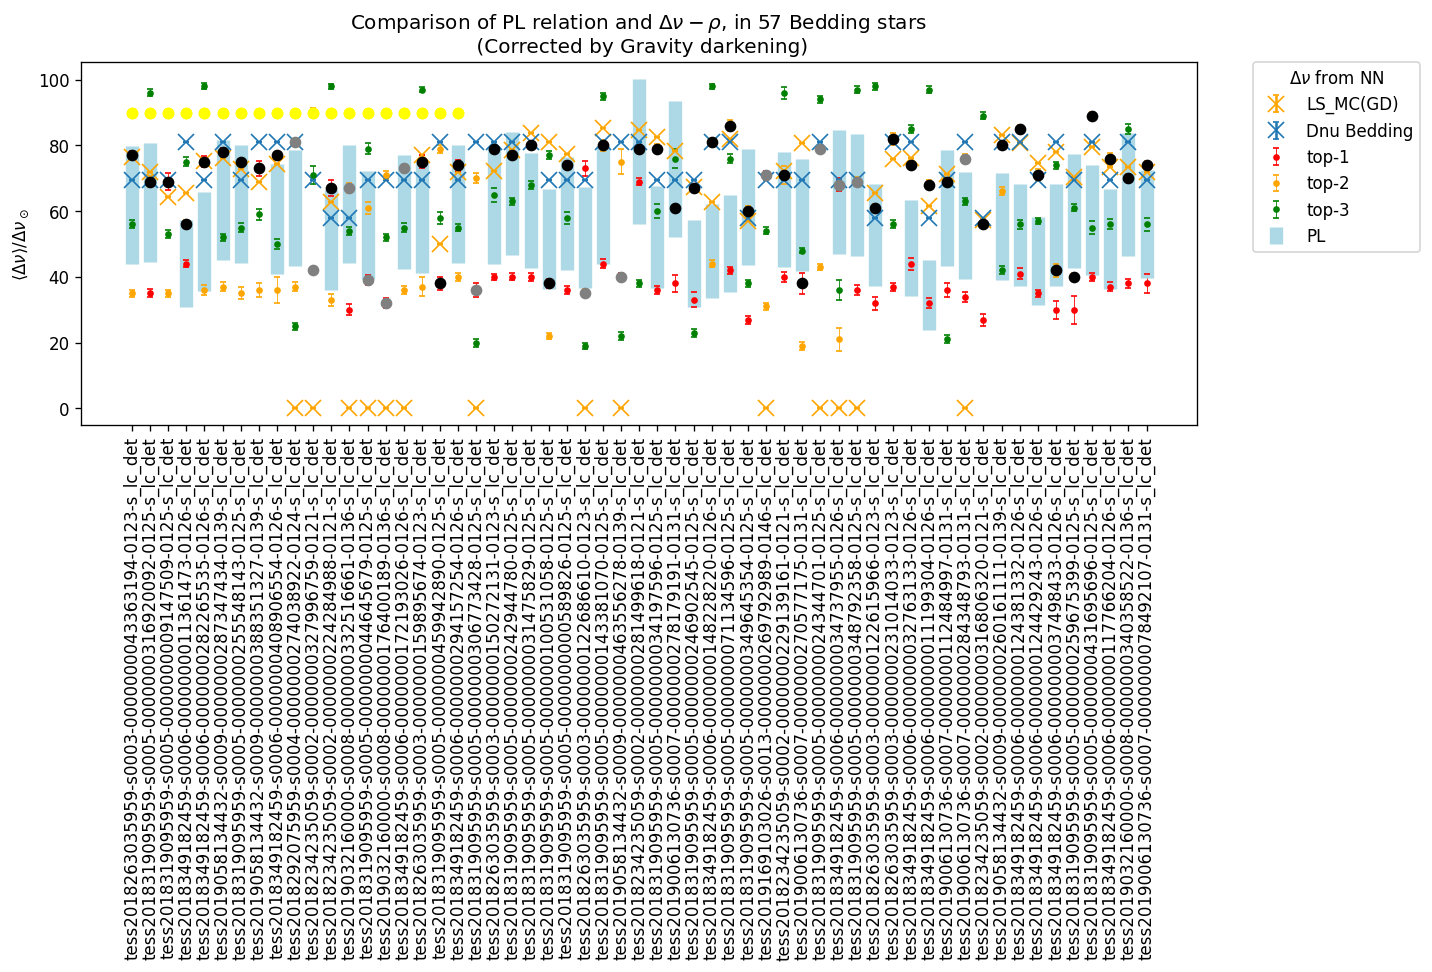

57


In [65]:
targets = results_bedding["dnu-target"]
inferences = results_bedding["best-top"]
inferences_top2 = results_bedding["top2"]
besttopgd = results_bedding["best-top-gd"]
isnaLSMC = results_bedding["is_na_LS_MC"]

plt.subplots(1, figsize=(12, 4), dpi=120)


for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], 90, color="yellow", zorder=1000)


def map_type(flag):
    return "*" if flag else "_"

for i, txt in enumerate(ids):
    if ids[i] in stars_fundamental_mode:
        plt.scatter(ids[i], 90, color="yellow", zorder=1000)
    """
    # get prediction
    flag = clf.predict(gmm_clust_data[gmm_clust_data["star_ids"]==ids[i]][selected_vars_gmm].values)
    if flag:
        plt.scatter(ids[i], inferences[i], color="black", zorder=1000)
    else:
        plt.scatter(ids[i], inferences_top2[i], color="grey", zorder=1000)
    """
    if isnaLSMC[i]:
        plt.scatter(ids[i], besttopgd[i], color="black", zorder=1000)
    else:
        plt.scatter(ids[i], inferences[i], color="grey", zorder=1000)


plt.errorbar(
    results_bedding["id"],
    results_bedding["LS_MC"],
    0,
    fmt="x",
    markersize=10,
    capsize=2,
    label="LS_MC(GD)",
    color="orange"
)

plt.errorbar(
    results_bedding["id"],
    results_bedding["dnu-target"],
    0,
    fmt="x",
    markersize=10,
    capsize=2,
    label="Dnu Bedding",
)
plt.errorbar(
    results_bedding["id"],
    results_bedding["top1"],
    results_bedding["e-top1"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="red",
    label="top-1",
)
plt.errorbar(
    df["id"],
    df["top2"],
    df["e-top2"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="top-2",
)


plt.errorbar(
    df["id"],
    df["top3"],
    df["e-top3"],
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="top-3",
)
"""
plt.errorbar(
    df["id"],
    (df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2,
    df["dnu-from-P-up-fromstarmodel"] - ((df["dnu-from-P-up-fromstarmodel"] + df["dnu-from-P-down-fromstarmodel"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=10,
    label="PL-From Teff",
    color="blue",
)
"""

plt.errorbar(
    df["id"],
    (df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2,
    df["dnu-from-P-up"] - ((df["dnu-from-P-up"] + df["dnu-from-P-down"]) / 2),
    elinewidth=8,
    fmt="o",
    markersize=0,
    capsize=0,
    label="PL",
    color="lightblue",
)


plt.xticks(rotation=90)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    title=r"$\Delta\nu$ from NN",
)
# plt.gca().add_artist(legend1)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("Comparison of PL relation and $\Delta\\nu-\\rho$, in 57 Bedding stars \n (Corrected by Gravity darkening)")
# plt.ylim(0, 1.0)
plt.show()
print(len(df.index))

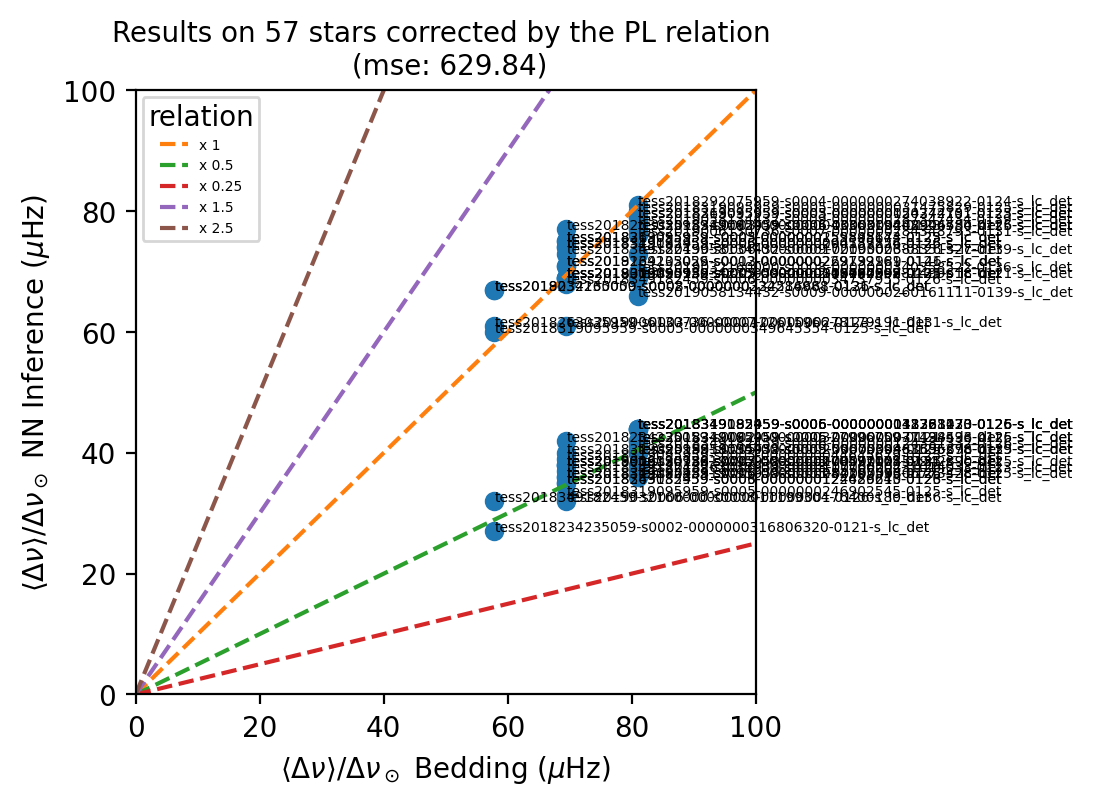

In [66]:
#### Prepare data plot
targets = results_bedding["dnu-target"]
inferences = results_bedding["best-top"]
ids = results_bedding["id"]

# Set lims
plt.subplots(1, figsize=(4, 4), dpi=200)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(targets, inferences, "o")  # Plot relation
for i, txt in enumerate(ids):
    plt.annotate(txt, (targets[i], inferences[i]), size=5)

# Add multiple and submultiples
abline(1, 0)
abline(0.5, 0)
abline(0.25, 0)
abline(1.5, 0)
abline(2.5, 0)
plt.legend(title="relation", fontsize=5)
plt.xlabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ Bedding ($\mu$Hz)")
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$ NN Inference ($\mu$Hz)")
plt.title(
    "Results on 57 stars corrected by the PL relation \n (mse: %s)"
    % np.round(np.mean(np.power(np.asarray(targets) - np.asarray(inferences), 2)), 2),
    fontsize=10,
)
plt.show()

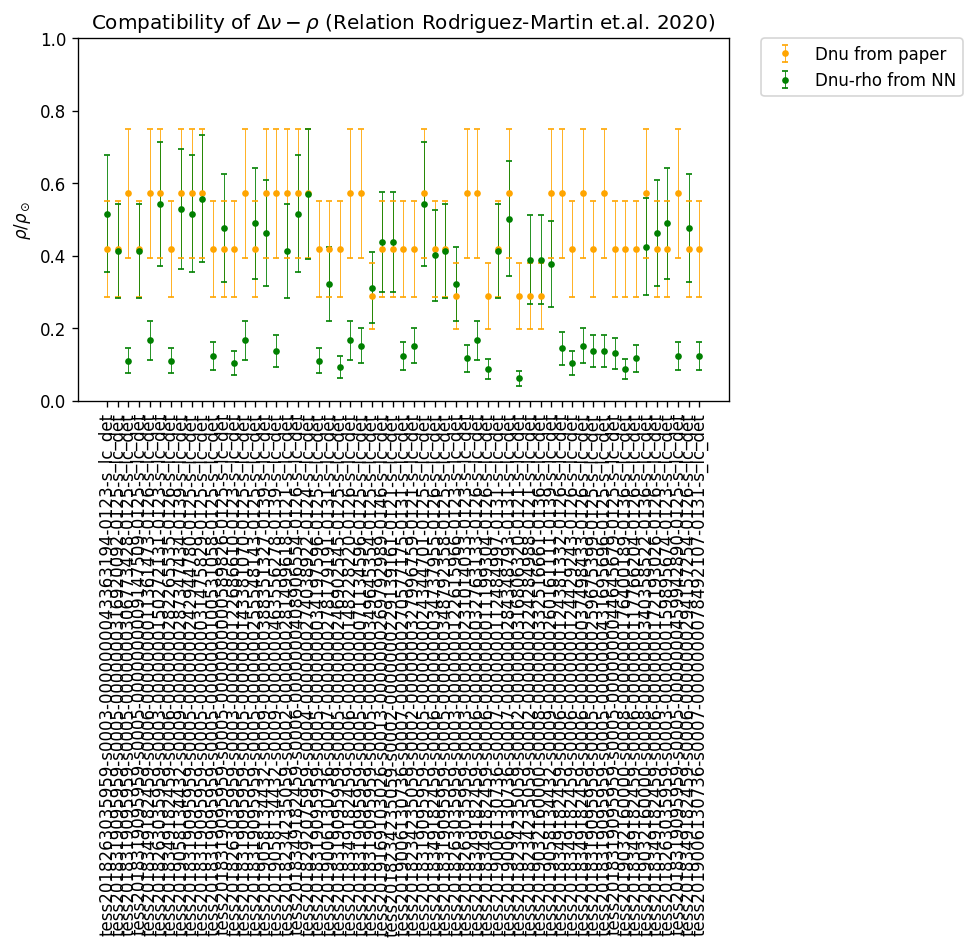

In [67]:
plt.subplots(1, figsize=(7, 4), dpi=120)

plt.errorbar(
    ids,
    get_rho(targets / dnu_sun),
    rho_error(np.float64(targets / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="orange",
    label="Dnu from paper",
)

plt.errorbar(
    ids,
    get_rho(inferences / dnu_sun),
    rho_error(np.float64(inferences / dnu_sun)),
    elinewidth=0.5,
    markersize=3,
    capsize=2,
    fmt="o",
    color="green",
    label="Dnu-rho from NN",
)

plt.xticks(rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
# plt.gca().add_artist(legend1)

plt.ylabel("$\\rho / \\rho_\\odot$")
plt.title("Compatibility of $\Delta\\nu-\\rho$ (Relation Rodriguez-Martin et.al. 2020)")
plt.ylim(0, 1.0)
plt.show()

In [68]:
# Get inferenes "close" to targets and create a True/Flase flag
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
vals = np.asarray(targets, dtype=float)[sign == True]

# Get stars in stars_fundamental_mode list mode
list_stars_in_fundamental_model = [
    (i, i in stars_fundamental_mode) for i in df[sign]["id"].values
]
import pprint

print(pprint.pformat(list_stars_in_fundamental_model))

# Get percentage
print(
    "Percentage of stars radial mode in NN inference: %f"
    % (
        sum([i in stars_fundamental_mode for i in df[sign]["id"].values])
        / len(stars_fundamental_mode)
    )
)

[('tess2018263035959-s0003-0000000043363194-0123-s_lc_det', True),
 ('tess2018319095959-s0005-0000000316920092-0125-s_lc_det', True),
 ('tess2018319095959-s0005-0000000009147509-0125-s_lc_det', True),
 ('tess2018263035959-s0003-0000000150272131-0123-s_lc_det', False),
 ('tess2019058134432-s0009-0000000287347434-0139-s_lc_det', True),
 ('tess2018319095959-s0005-0000000242944780-0125-s_lc_det', False),
 ('tess2018319095959-s0005-0000000031475829-0125-s_lc_det', False),
 ('tess2018319095959-s0005-0000000000589826-0125-s_lc_det', False),
 ('tess2018319095959-s0005-0000000255548143-0125-s_lc_det', True),
 ('tess2019058134432-s0009-0000000388351327-0139-s_lc_det', True),
 ('tess2018349182459-s0006-0000000408906554-0126-s_lc_det', True),
 ('tess2018292075959-s0004-0000000274038922-0124-s_lc_det', True),
 ('tess2019006130736-s0007-0000000278179191-0131-s_lc_det', False),
 ('tess2018319095959-s0005-0000000349645354-0125-s_lc_det', False),
 ('tess2019169103026-s0013-0000000269792989-0146-s_lc_de

In [69]:
sign = np.abs(np.asarray(targets) - np.asarray(inferences)) < 10
np.count_nonzero(sign)

vals = np.asarray(targets, dtype=float)[sign == True]

df[sign == True]

id  dnu-target top1  \
0   tess2018263035959-s0003-0000000043363194-0123-...   69.444444   77   
1   tess2018319095959-s0005-0000000316920092-0125-...   69.444444   35   
3   tess2018319095959-s0005-0000000009147509-0125-...   69.444444   69   
5   tess2018263035959-s0003-0000000150272131-0123-...   81.018519   40   
7   tess2019058134432-s0009-0000000287347434-0139-...   81.018519   78   
8   tess2018319095959-s0005-0000000242944780-0125-...   81.018519   40   
9   tess2018319095959-s0005-0000000031475829-0125-...   81.018519   40   
11  tess2018319095959-s0005-0000000000589826-0125-...   69.444444   36   
14  tess2018319095959-s0005-0000000255548143-0125-...   69.444444   75   
15  tess2019058134432-s0009-0000000388351327-0139-...   81.018519   73   
18  tess2018349182459-s0006-0000000408906554-0126-...   81.018519   77   
19  tess2018292075959-s0004-0000000274038922-0124-...   81.018519   81   
21  tess2019006130736-s0007-0000000278179191-0131-...   69.444444   38   
25  tess2018319095959-s0005-0000000349645354-0125-...   57.870370   27   
26  tess2019169103026-s0013-0000000269792989-0146-...   69.444444   71   
27  tess2018234235059-s0002-0000000229139161-0121-...   69.444444   40   
30  tess2018319095959-s0005-0000000024344701-0125-...   81.018519   79   
31  tess2018349182459-s0006-0000000034737955-0126-...   69.444444   68   
32  tess2018319095959-s0005-0000000348792358-0125-...   69.444444   36   
33  tess2018263035959-s0003-0000000122615966-0123-...   57.870370   32   
37  tess2019006130736-s0007-0000000112484997-0131-...   69.444444   36   
38  tess2019006130736-s0007-0000000284348793-0131-...   81.018519   34   
40  tess2018234235059-s0002-0000000224284988-0121-...   57.870370   67   
41  tess2019032160000-s0008-0000000332516661-0136-...   57.870370   30   
52  tess2018349182459-s0006-0000000172193026-0126-...   69.444444   73   
53  tess2018263035959-s0003-0000000159895674-0123-...   69.444444   75   
55  tess2018349182459-s0006-0000000294157254-0126-...   69.444444   74   

      e-top1 top2    e-top2 top3    e-top3 top4    e-top4  \
0   1.180074   35  1.051584   56  1.271015   95  1.188352   
1   1.220290   69  1.579554   96  1.060360   54  2.088074   
3   2.681214   35  1.072096   53  1.132347   22  1.995597   
5   1.021932   79  1.254240   65  2.107169   54  1.198524   
7   1.100667   37  1.300252   52  1.098796   65  0.956583   
8   1.081245   77  1.093182   63  1.130061   51  1.112349   
9   1.334071   80  1.041860   68  1.270300   24  1.398529   
11  1.190560   74  1.140826   58  1.795380   21  1.505817   
14  1.004229   35  1.787321   55  1.411078   90  1.121688   
15  2.227243   36  2.260625   59  1.567218   25  1.685216   
18  1.019907   36  3.823671   50  1.578509   26  1.966609   
19  1.032950   37  1.343976   25  1.095920   67  1.278432   
21  2.534777   61  1.014434   76  2.832986   21  1.270569   
25  1.230694   60  1.614049   38  0.957913   95  1.052234   
26  1.262247   31  1.067596   54  1.074314   20  1.462074   
27  1.419688   71  2.621109   96  1.884200   20  2.795562   
30  1.043326   43  1.021916   94  1.049515   67  1.744769   
31  1.958508   21  3.420865   36  2.981769   50  1.271554   
32  1.447211   69  1.249618   97  0.965526   80  1.129024   
33  1.970273   61  1.072921   98  1.040089   76  1.247998   
37  2.209089   69  1.172194   21  1.186692   95  0.955620   
38  1.552033   76  1.353517   63  1.136501   89  1.741907   
40  2.499134   33  1.859342   98  0.776869   44  1.060025   
41  1.599047   67  1.567963   54  1.290611   43  2.647982   
52  1.028675   36  1.175884   55  1.297886   95  0.569002   
53  1.968248   37  2.914482   97  0.658845   19  1.758654   
55  1.685528   40  1.250194   55  1.133270   89  1.050565   

    dnu-from-P-up-fromstarmodel  dnu-from-P-down-fromstarmodel  dnu-from-P-up  \
0                     73.233508                      40.133400      79.806657   
1                     72.861387                      39.912695      80.599917   
3                         